# PHASE 1: PROJECT SETUP
### blah blah blah

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from datetime import datetime
import xgboost as xgb
import lightgbm as lgb
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

from matplotlib.colors import ListedColormap

train = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/train.csv")
actigraphy = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/stats.csv")
test = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/test.csv")
data_dict = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/data_dictionary.csv")
sample_sub = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/sample_submission.csv")

sns.set_theme(style="whitegrid")


display(train.head())
print(f"Train shape: {train.shape}")

display(actigraphy.head())
print(f"Actigraphy shape: {actigraphy.shape}")

display(test.head())
print(f"Test shape: {test.shape}")

display(data_dict.head())




,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,...,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,...,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,...,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,...,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train shape: (3960, 82)


,id,non_wear_percentage,unique_days,enmo_mean,enmo_std,enmo_min,enmo_25%,enmo_50%,enmo_75%,enmo_max,anglez_mean,anglez_std,anglez_min,anglez_25%,anglez_50%,anglez_75%,anglez_max,light_mean,light_std,light_min,light_25%,light_50%,light_75%,light_max,battery_voltage_mean,battery_voltage_std,battery_voltage_min,battery_voltage_25%,battery_voltage_50%,battery_voltage_75%,battery_voltage_max,n_records
0,0745c390,0.000000,37,0.045252,0.132576,0.0,0.007953,0.019257,0.036048,5.314874,-7.805897,34.917873,-89.987045,-32.948602,-6.358004,13.095750,89.422226,46.009533,205.862213,0.0,2.520257,8.230733,24.750000,2626.199951,4027.514893,108.451317,3829.000000,3958.000000,4029.0,4146.0,4187.0,50458.0
1,eaab7a96,4.650835,21,0.030345,0.099080,0.0,0.000405,0.006128,0.021883,3.966906,-6.688010,41.181725,-89.654587,-36.649960,-13.400013,15.455478,89.080330,58.183456,211.727158,0.0,3.865004,9.513979,26.543808,2628.199951,3825.719727,166.158646,3098.166748,3724.000000,3813.0,3947.0,4146.0,323849.0
2,8ec2cc63,0.000000,20,0.056544,0.140594,0.0,0.005643,0.018467,0.048282,5.066334,-11.934993,27.367514,-89.540176,-30.154542,-11.570901,5.009753,86.987267,77.305130,274.848145,0.0,2.918126,7.863636,21.022933,2618.199951,4106.425781,50.734318,3853.000000,4089.625000,4111.0,4140.0,4183.0,40003.0
3,b2987a65,0.000000,25,0.053544,0.103401,0.0,0.009947,0.027653,0.057278,6.134459,-12.847143,32.552841,-89.968369,-34.965618,-15.000056,4.816339,89.976074,9.369678,54.104408,0.0,0.893617,2.340206,6.200000,2502.000000,3958.604492,122.706802,3468.000000,3841.000000,3947.0,4064.0,6000.0,223915.0
4,7b8842c3,0.000000,35,0.040399,0.090201,0.0,0.005364,0.024135,0.043690,2.774382,-11.009835,47.933723,-89.770241,-46.348264,-13.665493,20.726226,89.300034,5.049157,15.590773,0.0,1.438378,2.897436,4.942201,1046.800049,3992.347656,126.121590,3815.083252,3837.333252,4000.0,4087.0,4199.0,15420.0


Actigraphy shape: (996, 32)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Test shape: (20, 59)


,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


# PHASE 2: EXPLORATORY DATA ANALYSIS - FEATURES
### blah blah blah

Shape of dataset: (3960, 82)

Data types:
 id                                         object
Basic_Demos-Enroll_Season                  object
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-Season                                object
                                           ...   
SDS-SDS_Total_Raw                         float64
SDS-SDS_Total_T                           float64
PreInt_EduHx-Season                        object
PreInt_EduHx-computerinternet_hoursday    float64
sii                                       float64
Length: 82, dtype: object


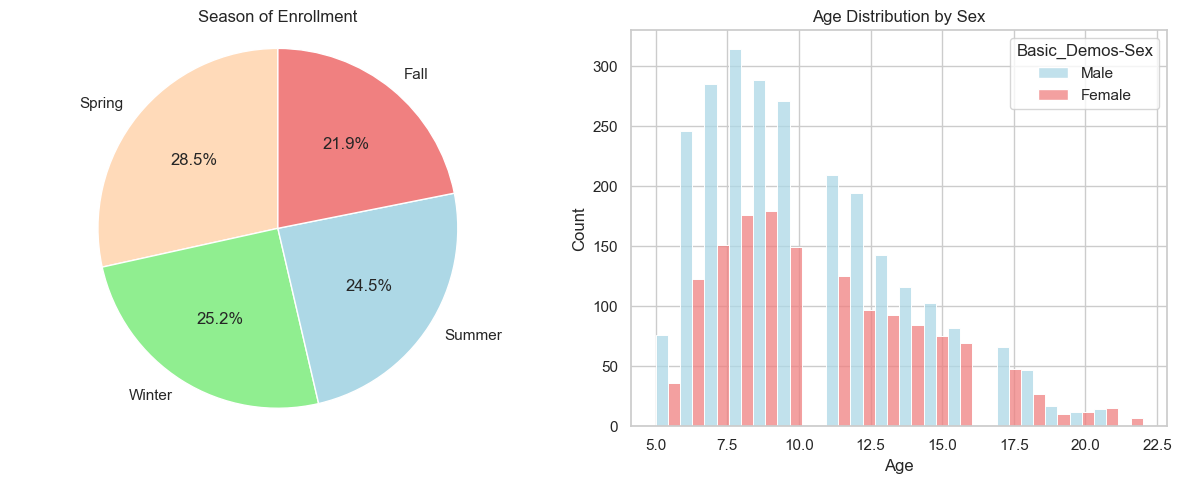

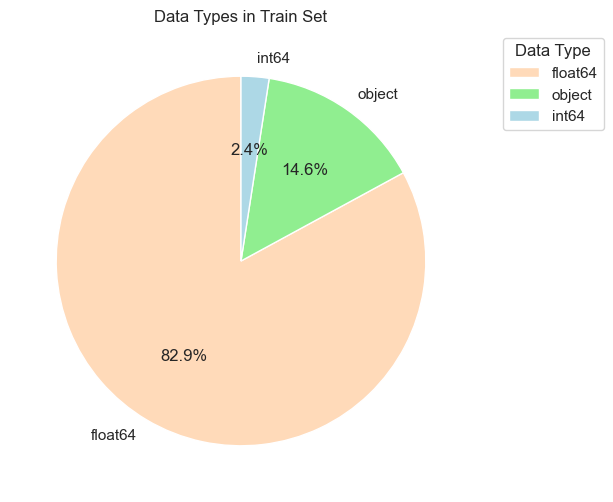

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
count,3960,3960,3960.000000,3960.000000,2555,2421.000000,3310,3022.000000,3027.000000,3076.000000,...,2728.000000,2730.000000,2733.000000,2736.000000,2618,2609.000000,2606.000000,3540,3301.000000,2736.000000
unique,3960,4,NaN,NaN,4,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN
top,00008ff9,Spring,NaN,NaN,Spring,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Spring,NaN,NaN,Spring,NaN,NaN
freq,1,1127,NaN,NaN,697,NaN,929,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,712,NaN,NaN,985,NaN,NaN
mean,NaN,NaN,10.433586,0.372727,NaN,65.454771,NaN,19.331929,55.946713,89.038615,...,1.613636,1.158974,0.943652,27.896199,NaN,41.088923,57.763622,NaN,1.060588,0.580409
std,NaN,NaN,3.574648,0.483591,NaN,22.341862,NaN,5.113934,7.473764,44.569040,...,1.529178,1.343661,1.185460,20.338853,NaN,10.427433,13.196091,NaN,1.094875,0.771122
min,NaN,NaN,5.000000,0.000000,NaN,25.000000,NaN,0.000000,33.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,17.000000,38.000000,NaN,0.000000,0.000000
25%,NaN,NaN,8.000000,0.000000,NaN,59.000000,NaN,15.869350,50.000000,57.200000,...,0.000000,0.000000,0.000000,12.000000,NaN,33.000000,47.000000,NaN,0.000000,0.000000
50%,NaN,NaN,10.000000,0.000000,NaN,65.000000,NaN,17.937682,55.000000,77.000000,...,1.000000,1.000000,1.000000,26.000000,NaN,39.000000,55.000000,NaN,1.000000,0.000000
75%,NaN,NaN,13.000000,1.000000,NaN,75.000000,NaN,21.571244,62.000000,113.800000,...,2.000000,2.000000,1.000000,41.000000,NaN,46.000000,64.000000,NaN,2.000000,1.000000


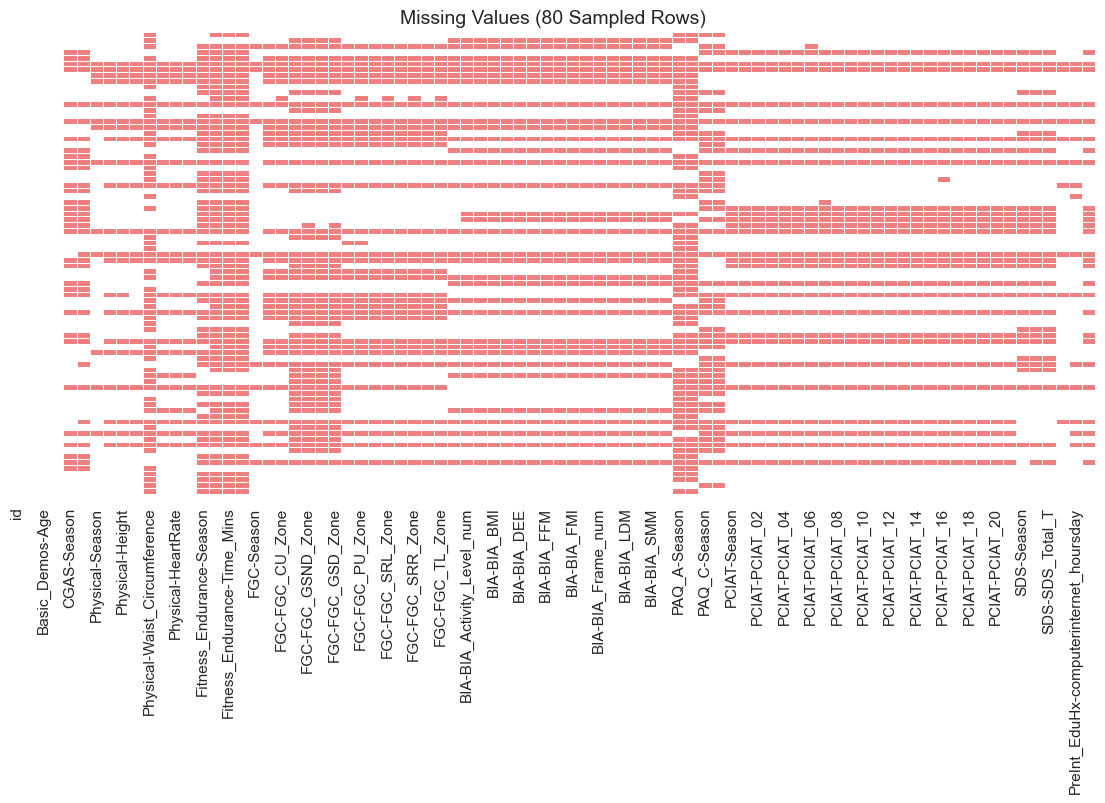

Duplicate rows: 0


id                           3960
Basic_Demos-Enroll_Season       4
CGAS-Season                     4
Physical-Season                 4
Fitness_Endurance-Season        4
FGC-Season                      4
BIA-Season                      4
PAQ_A-Season                    4
PAQ_C-Season                    4
PCIAT-Season                    4
SDS-Season                      4
PreInt_EduHx-Season             4
dtype: int64

In [52]:
print("Shape of dataset:", train.shape)
print("\nData types:\n", train.dtypes)

dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["feature", "dtype"]

dtype_counts = dtype_df["dtype"].value_counts().reset_index()
dtype_counts.columns = ["dtype", "count"]

custom_colors = ['#FFDAB9', '#90EE90', '#ADD8E6', '#F08080', '#FFFACD']

# simple demographics
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# season of Enrollment
season_counts = train['Basic_Demos-Enroll_Season'].value_counts(dropna=False)

axes[0].pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors
)
axes[0].set_title('Season of Enrollment')
axes[0].axis('equal')

# Age Distribution by Sex
sns.histplot(
    data=train.replace({'Basic_Demos-Sex': {0: 'Male', 1: 'Female'}}),
    x='Basic_Demos-Age',
    hue='Basic_Demos-Sex', multiple='dodge',
    palette=[custom_colors[2], custom_colors[3]], bins=20, ax=axes[1]
)
axes[1].set_title('Age Distribution by Sex')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# visualize data types
plt.figure(figsize=(8, 6))
plt.pie(dtype_counts["count"],
        labels=dtype_counts["dtype"],
        colors=custom_colors,
        autopct='%1.1f%%',
        startangle=90,
       )
plt.title("Data Types in Train Set")
plt.legend(title="Data Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# descriptive statistics
display(train.describe(include='all'))

# visualize missing values
sampled = train.sample(80, random_state=42)

# create the red & white heatmap
cmap = ListedColormap(["#ffffff", custom_colors[3]])  # white & red
plt.figure(figsize=(14, 6))
sns.heatmap(sampled.isnull(), 
            cbar=False, 
            cmap=cmap, 
            yticklabels=False, 
            linewidths=0.5, 
            linecolor="white")
plt.title("Missing Values (80 Sampled Rows)", fontsize=14)
plt.show()

# remove duplicate rows
duplicate_count = train.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

# boxplots for numeric columns
# for col in train.select_dtypes(include='number').columns:
#     plt.figure()
#     sns.boxplot(x=train[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

# for categorical vallues - check the number of unique values
categorical_cols = train.select_dtypes(include=["object", "category"]).columns
train[categorical_cols].nunique().sort_values(ascending=False)


# identify individual features for univariate analysis. NUM & CATEGORICAL

# identify features for bivariate analysis (features vs. target variable [sii]). NUM vs. sii, CATEGORICAL vs. sii

# identify features for multivariate analysis (relationships between multiple features)




Starting Comprehensive EDA for CMI Dataset...
=== TARGET VARIABLE ANALYSIS ===


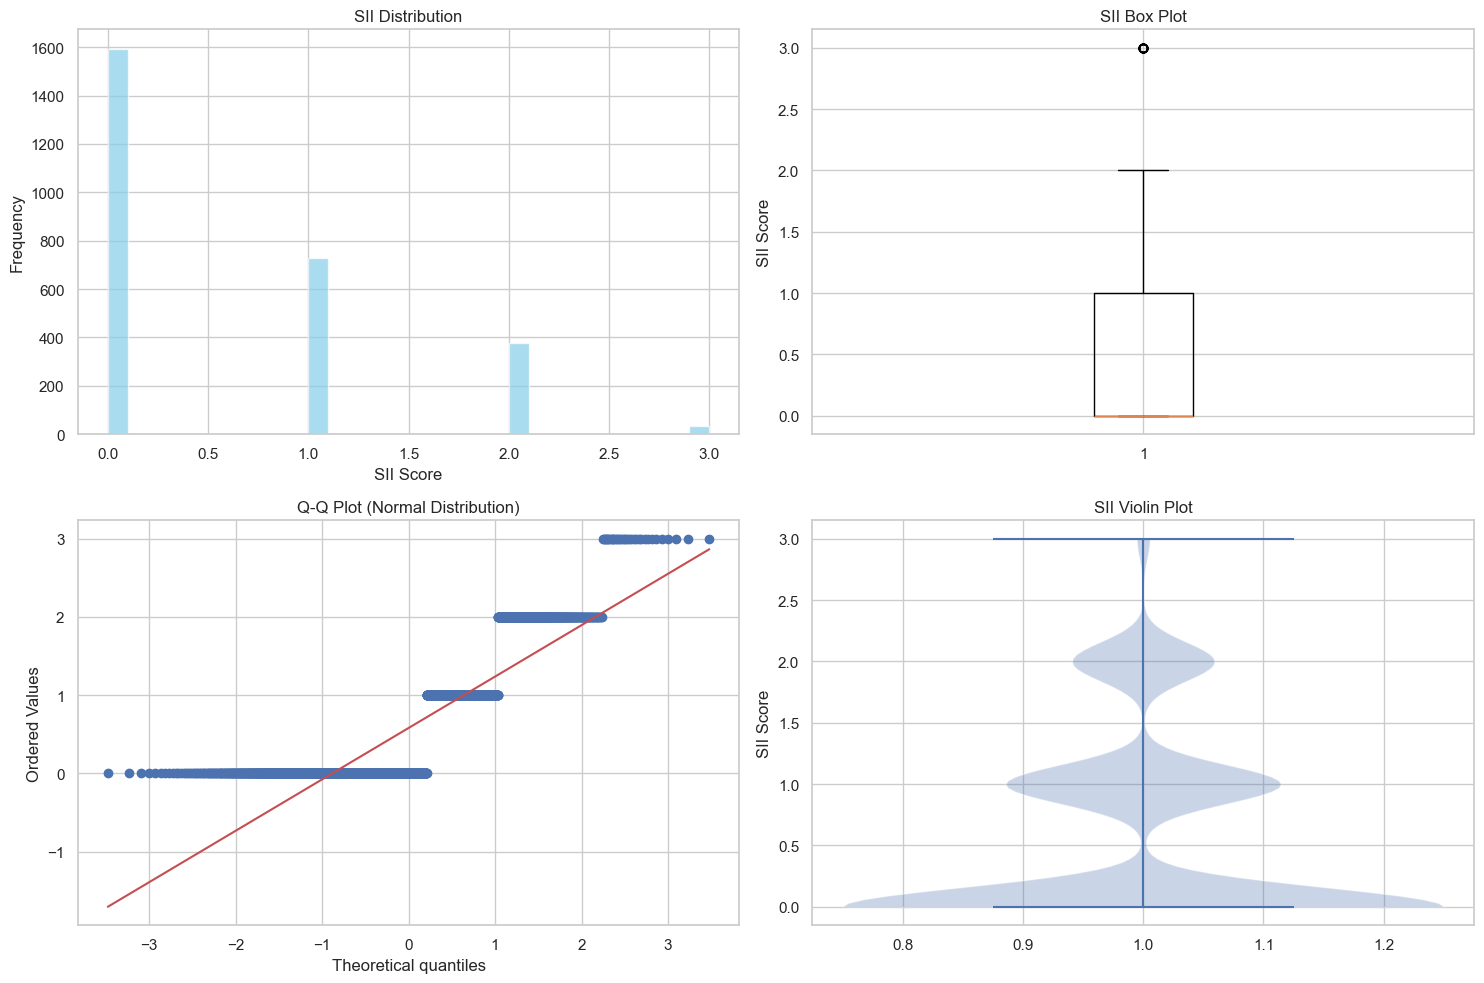


SII Statistics:
count    2736.000000
mean        0.580409
std         0.771122
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: sii, dtype: float64

Skewness: 1.041
Kurtosis: 0.004
Shapiro-Wilk p-value: 0.000000
Distribution is non-normal

=== DEMOGRAPHIC ANALYSIS ===


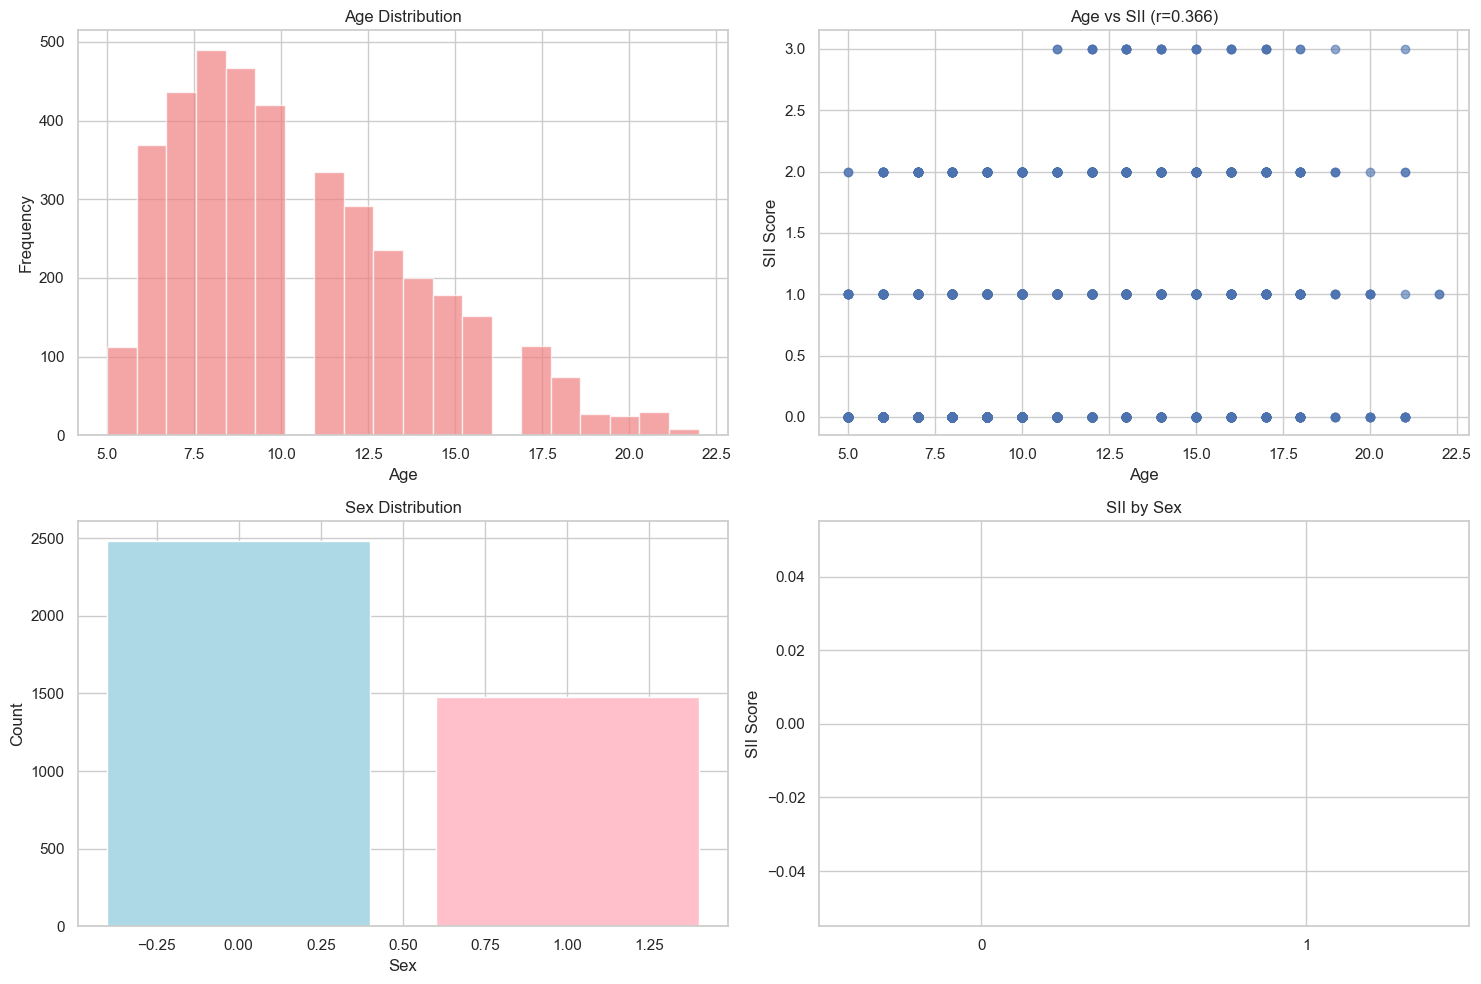


SII by Age Group:
                 mean       std  count
age_group                             
Child        0.269000  0.544918   1000
PreTeen      0.610280  0.746985   1070
Teen         0.986220  0.875824    508
Young_Adult  1.044304  0.905362    158

=== PHYSICAL HEALTH ANALYSIS ===


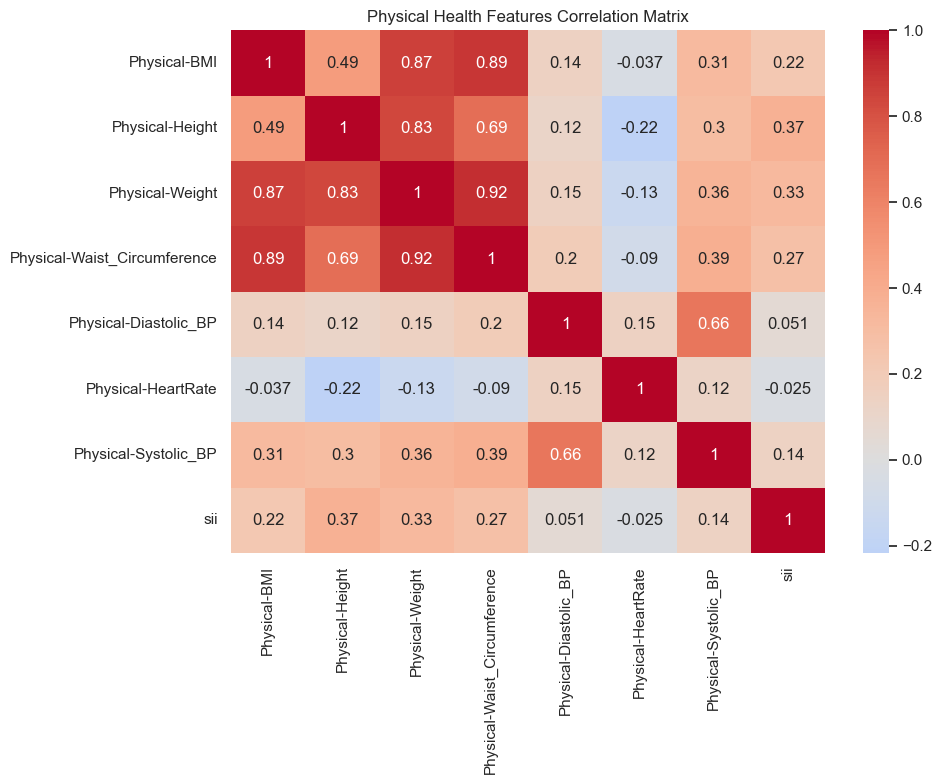

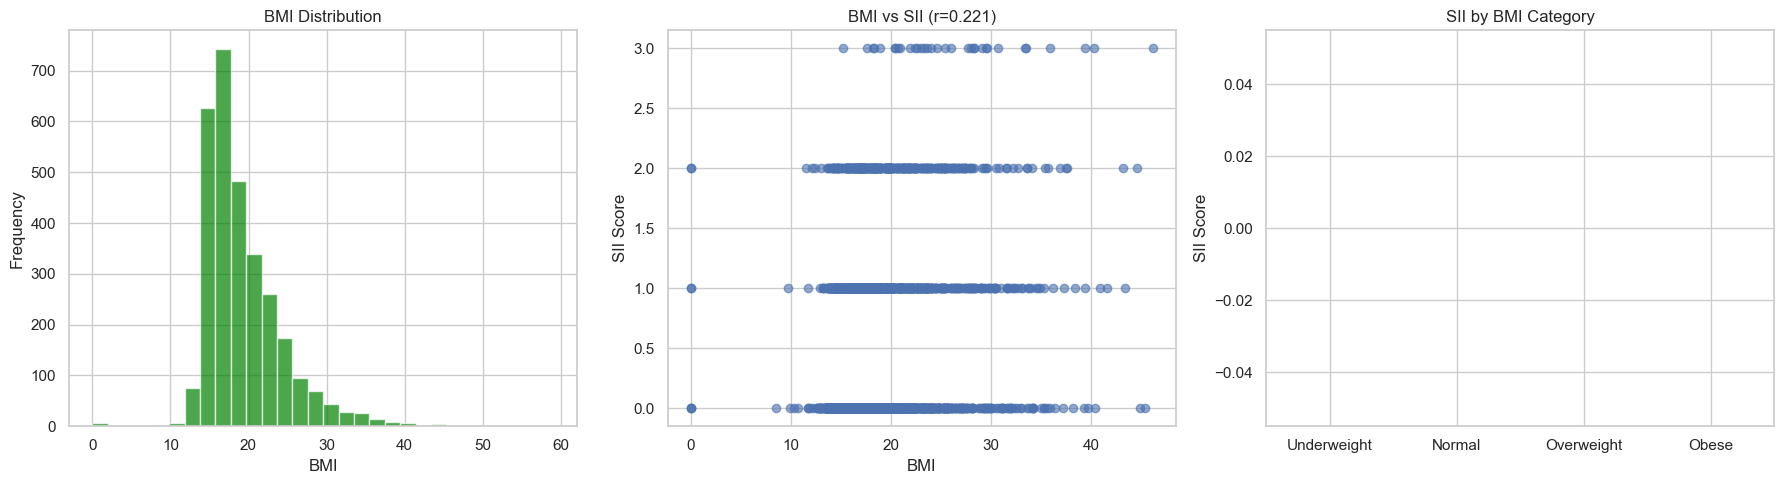


Top Physical Health Features (by correlation with SII):
Physical-Height: 0.374
Physical-Weight: 0.326
Physical-Waist_Circumference: 0.273
Physical-BMI: 0.221
Physical-Systolic_BP: 0.135
Physical-Diastolic_BP: 0.051
Physical-HeartRate: 0.025

=== PSYCHOLOGICAL FEATURES ANALYSIS ===


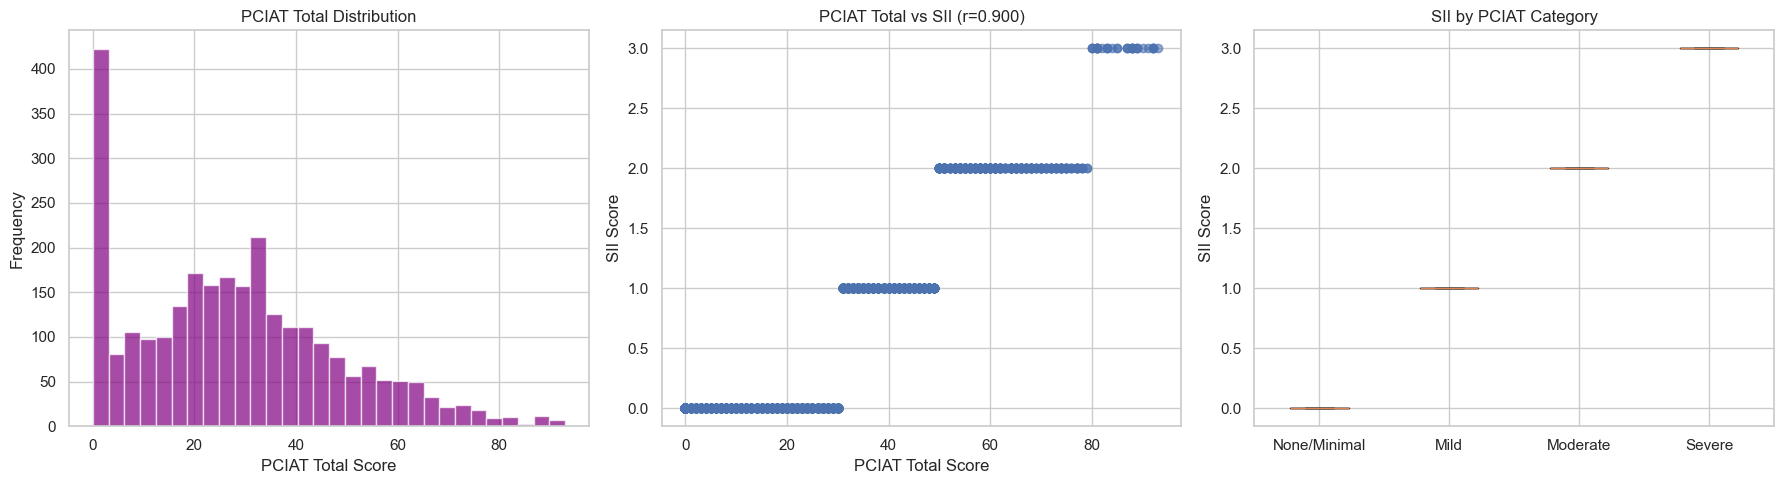


Top PCIAT Items (by correlation with SII):
PCIAT-PCIAT_15: 0.751
PCIAT-PCIAT_18: 0.731
PCIAT-PCIAT_17: 0.730
PCIAT-PCIAT_05: 0.723
PCIAT-PCIAT_13: 0.706
PCIAT-PCIAT_20: 0.703
PCIAT-PCIAT_16: 0.699
PCIAT-PCIAT_08: 0.695
PCIAT-PCIAT_03: 0.695
PCIAT-PCIAT_02: 0.695

=== ACTIVITY FEATURES ANALYSIS ===


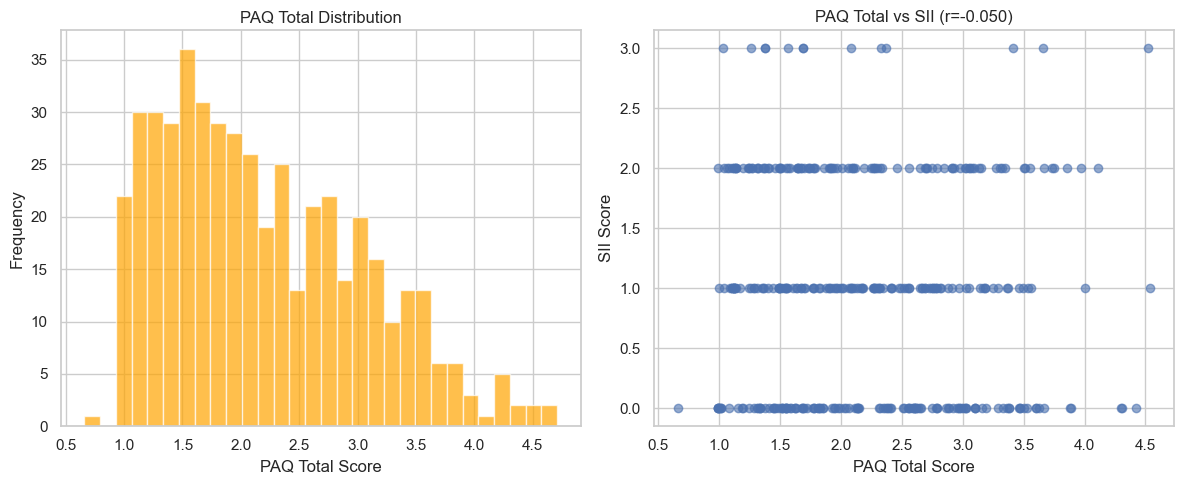

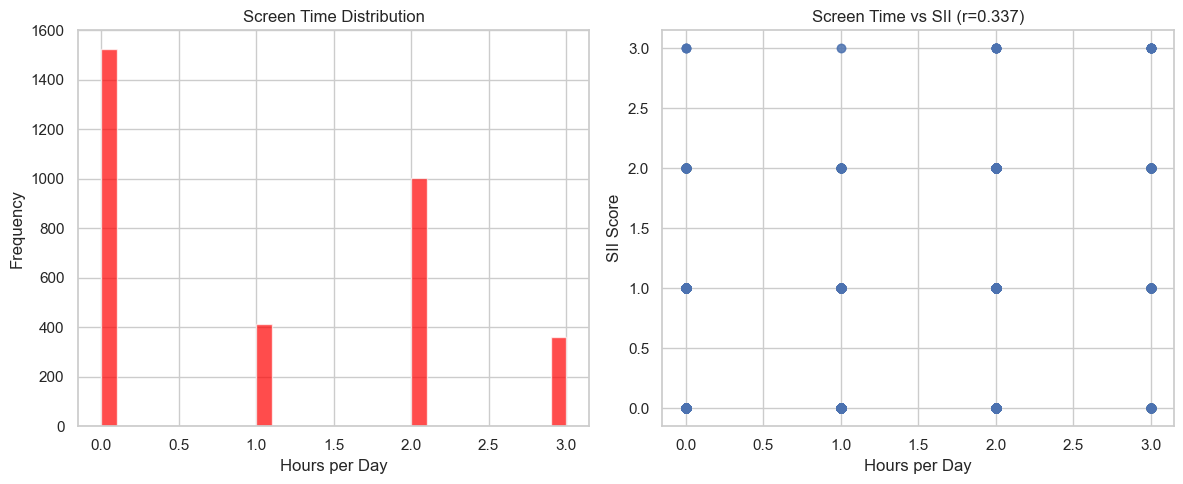


=== MISSING DATA PATTERN ANALYSIS ===


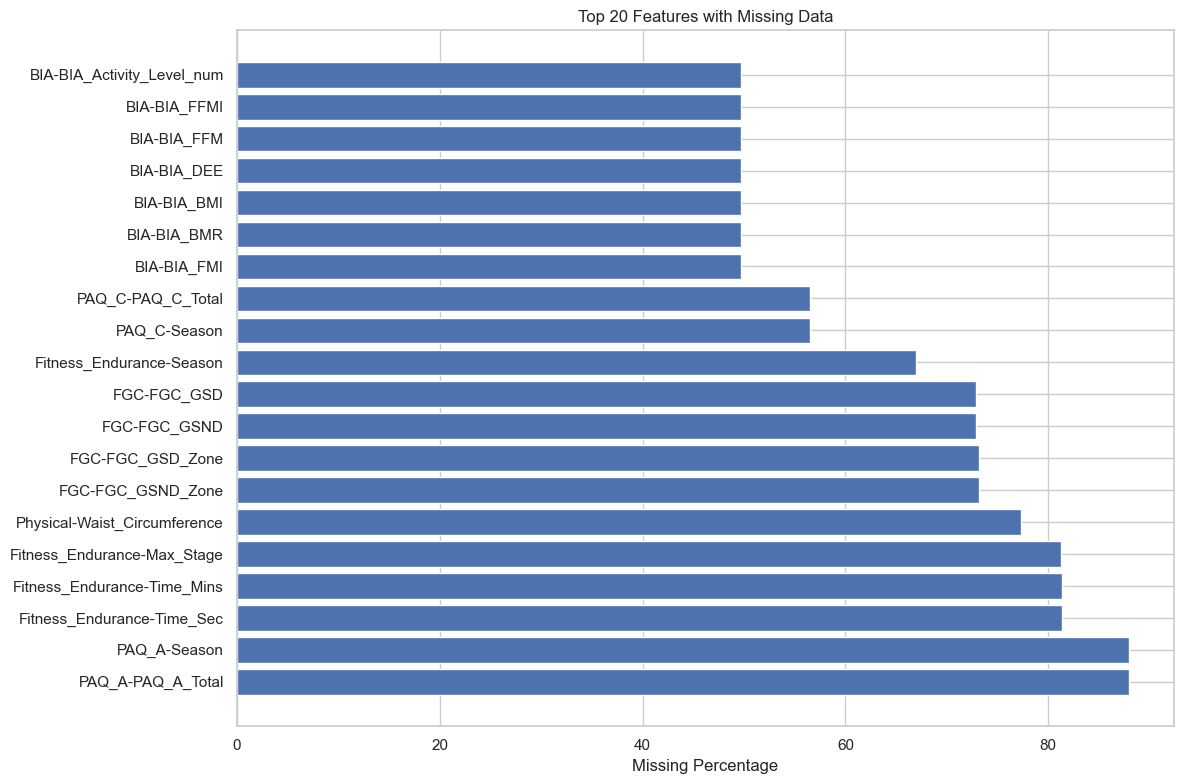


Correlation between missingness and SII:
FGC-FGC_GSND: 0.244
FGC-FGC_GSND_Zone: 0.243
FGC-FGC_GSD: 0.242
FGC-FGC_GSD_Zone: 0.240
PAQ_A-Season: 0.206
PAQ_A-PAQ_A_Total: 0.206
Fitness_Endurance-Season: 0.138
Fitness_Endurance-Time_Sec: 0.113
Fitness_Endurance-Max_Stage: 0.112
Fitness_Endurance-Time_Mins: 0.111

=== FEATURE CORRELATION ANALYSIS ===


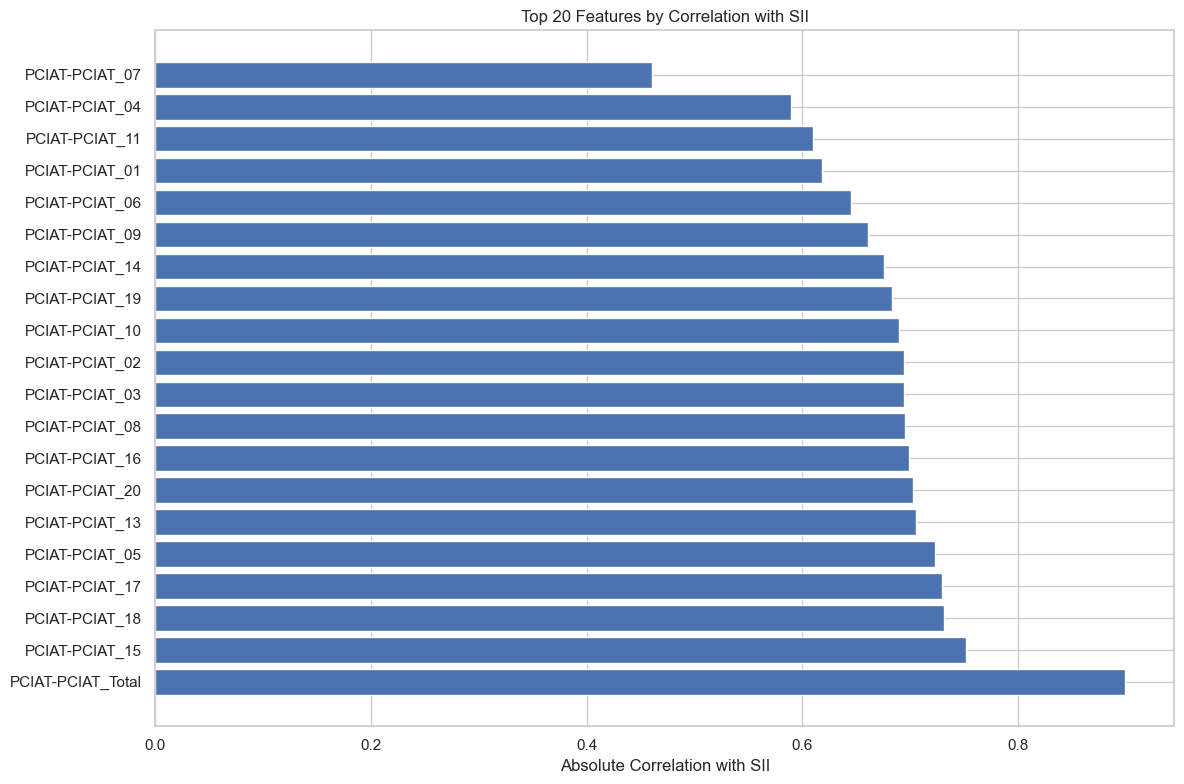


Top 20 Features by Correlation with SII:
PCIAT-PCIAT_Total: 0.900
PCIAT-PCIAT_15: 0.751
PCIAT-PCIAT_18: 0.731
PCIAT-PCIAT_17: 0.730
PCIAT-PCIAT_05: 0.723
PCIAT-PCIAT_13: 0.706
PCIAT-PCIAT_20: 0.703
PCIAT-PCIAT_16: 0.699
PCIAT-PCIAT_08: 0.695
PCIAT-PCIAT_03: 0.695
PCIAT-PCIAT_02: 0.695
PCIAT-PCIAT_10: 0.690
PCIAT-PCIAT_19: 0.683
PCIAT-PCIAT_14: 0.676
PCIAT-PCIAT_09: 0.660
PCIAT-PCIAT_06: 0.646
PCIAT-PCIAT_01: 0.618
PCIAT-PCIAT_11: 0.610
PCIAT-PCIAT_04: 0.589
PCIAT-PCIAT_07: 0.461

=== FEATURE ENGINEERING INSIGHTS ===
Key insights for feature engineering:
- Age correlation with SII: 0.366
- Age group analysis suggests different SII patterns across development stages
- BMI correlation with SII: 0.221
- PCIAT Total correlation with SII: 0.900
- Activity-Screen balance correlation: -0.160

=== EDA COMPLETE ===
All analyses have been performed. Use the insights to guide your feature engineering and model selection.


In [3]:

import warnings
warnings.filterwarnings('ignore')

class CMI_EDA_Analyzer:
    """
    Comprehensive EDA pipeline for CMI Problematic Internet Use dataset
    """
    
    def __init__(self, train_df, test_df, target_col='sii'):
        self.train_df = train_df.copy()
        self.test_df = test_df.copy()
        self.target_col = target_col
        self.feature_groups = self._define_feature_groups()
        
    def _define_feature_groups(self):
        """Define feature groups for organized analysis"""
        return {
            'demographics': ['Basic_Demos-Age', 'Basic_Demos-Sex', 'Basic_Demos-Enroll_Season'],
            'physical_basic': ['Physical-BMI', 'Physical-Height', 'Physical-Weight', 
                             'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 
                             'Physical-HeartRate', 'Physical-Systolic_BP'],
            'fitness': ['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 
                       'Fitness_Endurance-Time_Sec'],
            'functional_tests': [col for col in self.train_df.columns if 'FGC-' in col],
            'body_composition': [col for col in self.train_df.columns if 'BIA-' in col],
            'activity_questionnaires': [col for col in self.train_df.columns if 'PAQ_' in col],
            'psychological': [col for col in self.train_df.columns if 'PCIAT-' in col],
            'other_assessments': [col for col in self.train_df.columns if 'SDS-' in col or 'CGAS-' in col],
            'education': [col for col in self.train_df.columns if 'PreInt_EduHx-' in col]
        }
    
    def analyze_target_distribution(self):
        """Analyze the target variable (SII) distribution"""
        print("=== TARGET VARIABLE ANALYSIS ===")
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Histogram
        axes[0,0].hist(self.train_df[self.target_col].dropna(), bins=30, alpha=0.7, color='skyblue')
        axes[0,0].set_title('SII Distribution')
        axes[0,0].set_xlabel('SII Score')
        axes[0,0].set_ylabel('Frequency')
        
        # Box plot
        axes[0,1].boxplot(self.train_df[self.target_col].dropna())
        axes[0,1].set_title('SII Box Plot')
        axes[0,1].set_ylabel('SII Score')
        
        # Q-Q plot
        stats.probplot(self.train_df[self.target_col].dropna(), dist="norm", plot=axes[1,0])
        axes[1,0].set_title('Q-Q Plot (Normal Distribution)')
        
        # Violin plot
        axes[1,1].violinplot(self.train_df[self.target_col].dropna())
        axes[1,1].set_title('SII Violin Plot')
        axes[1,1].set_ylabel('SII Score')
        
        plt.tight_layout()
        plt.show()
        
        # Statistics
        sii_stats = self.train_df[self.target_col].describe()
        print("\nSII Statistics:")
        print(sii_stats)
        
        # Skewness and kurtosis
        skewness = stats.skew(self.train_df[self.target_col].dropna())
        kurtosis = stats.kurtosis(self.train_df[self.target_col].dropna())
        print(f"\nSkewness: {skewness:.3f}")
        print(f"Kurtosis: {kurtosis:.3f}")
        
        # Check for normality
        _, p_value = stats.shapiro(self.train_df[self.target_col].dropna()[:5000])  # Limit for computational efficiency
        print(f"Shapiro-Wilk p-value: {p_value:.6f}")
        print("Distribution is", "normal" if p_value > 0.05 else "non-normal")
        
        return sii_stats
    
    def analyze_demographics(self):
        """Analyze demographic variables and their relationship with SII"""
        print("\n=== DEMOGRAPHIC ANALYSIS ===")
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Age distribution
        axes[0,0].hist(self.train_df['Basic_Demos-Age'].dropna(), bins=20, alpha=0.7, color='lightcoral')
        axes[0,0].set_title('Age Distribution')
        axes[0,0].set_xlabel('Age')
        axes[0,0].set_ylabel('Frequency')
        
        # Age vs SII
        age_sii_corr = self.train_df[['Basic_Demos-Age', self.target_col]].corr().iloc[0,1]
        axes[0,1].scatter(self.train_df['Basic_Demos-Age'], self.train_df[self.target_col], alpha=0.6)
        axes[0,1].set_title(f'Age vs SII (r={age_sii_corr:.3f})')
        axes[0,1].set_xlabel('Age')
        axes[0,1].set_ylabel('SII Score')
        
        # Sex distribution
        if 'Basic_Demos-Sex' in self.train_df.columns:
            sex_counts = self.train_df['Basic_Demos-Sex'].value_counts()
            axes[1,0].bar(sex_counts.index, sex_counts.values, color=['lightblue', 'pink'])
            axes[1,0].set_title('Sex Distribution')
            axes[1,0].set_xlabel('Sex')
            axes[1,0].set_ylabel('Count')
        
        # SII by Sex
        if 'Basic_Demos-Sex' in self.train_df.columns:
            sex_groups = self.train_df.groupby('Basic_Demos-Sex')[self.target_col].apply(list)
            axes[1,1].boxplot([sex_groups.iloc[i] for i in range(len(sex_groups))], 
                            labels=sex_groups.index)
            axes[1,1].set_title('SII by Sex')
            axes[1,1].set_ylabel('SII Score')
        
        plt.tight_layout()
        plt.show()
        
        # Age group analysis
        self.train_df['age_group'] = pd.cut(self.train_df['Basic_Demos-Age'], 
                                          bins=[0, 8, 12, 16, 25], 
                                          labels=['Child', 'PreTeen', 'Teen', 'Young_Adult'])
        
        age_group_stats = self.train_df.groupby('age_group')[self.target_col].agg(['mean', 'std', 'count'])
        print("\nSII by Age Group:")
        print(age_group_stats)
        
        return age_group_stats
    
    def analyze_physical_health(self):
        """Analyze physical health metrics"""
        print("\n=== PHYSICAL HEALTH ANALYSIS ===")
        
        physical_features = self.feature_groups['physical_basic']
        available_features = [f for f in physical_features if f in self.train_df.columns]
        
        if not available_features:
            print("No physical health features found!")
            return
        
        # Correlation heatmap
        corr_data = self.train_df[available_features + [self.target_col]].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0)
        plt.title('Physical Health Features Correlation Matrix')
        plt.tight_layout()
        plt.show()
        
        # BMI analysis (if available)
        if 'Physical-BMI' in self.train_df.columns:
            fig, axes = plt.subplots(1, 3, figsize=(18, 5))
            
            # BMI distribution
            axes[0].hist(self.train_df['Physical-BMI'].dropna(), bins=30, alpha=0.7, color='green')
            axes[0].set_title('BMI Distribution')
            axes[0].set_xlabel('BMI')
            axes[0].set_ylabel('Frequency')
            
            # BMI vs SII
            bmi_sii_corr = self.train_df[['Physical-BMI', self.target_col]].corr().iloc[0,1]
            axes[1].scatter(self.train_df['Physical-BMI'], self.train_df[self.target_col], alpha=0.6)
            axes[1].set_title(f'BMI vs SII (r={bmi_sii_corr:.3f})')
            axes[1].set_xlabel('BMI')
            axes[1].set_ylabel('SII Score')
            
            # BMI categories
            bmi_categories = pd.cut(self.train_df['Physical-BMI'], 
                                  bins=[0, 18.5, 25, 30, 100], 
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
            bmi_sii_by_cat = self.train_df.groupby(bmi_categories)[self.target_col].apply(list)
            axes[2].boxplot([bmi_sii_by_cat.iloc[i] for i in range(len(bmi_sii_by_cat))], 
                          labels=bmi_sii_by_cat.index)
            axes[2].set_title('SII by BMI Category')
            axes[2].set_ylabel('SII Score')
            
            plt.tight_layout()
            plt.show()
        
        # Feature importance for physical health
        physical_correlations = []
        for feature in available_features:
            if feature in self.train_df.columns:
                corr = self.train_df[[feature, self.target_col]].corr().iloc[0,1]
                physical_correlations.append((feature, abs(corr)))
        
        physical_correlations.sort(key=lambda x: x[1], reverse=True)
        print("\nTop Physical Health Features (by correlation with SII):")
        for feature, corr in physical_correlations[:10]:
            print(f"{feature}: {corr:.3f}")
        
        return physical_correlations
    
    def analyze_psychological_features(self):
        """Analyze psychological assessment features (PCIAT)"""
        print("\n=== PSYCHOLOGICAL FEATURES ANALYSIS ===")
        
        pciat_features = [col for col in self.train_df.columns if 'PCIAT-' in col]
        
        if not pciat_features:
            print("No PCIAT features found!")
            return
        
        # PCIAT Total analysis (if available)
        if 'PCIAT-PCIAT_Total' in self.train_df.columns:
            fig, axes = plt.subplots(1, 3, figsize=(18, 5))
            
            # PCIAT Total distribution
            axes[0].hist(self.train_df['PCIAT-PCIAT_Total'].dropna(), bins=30, alpha=0.7, color='purple')
            axes[0].set_title('PCIAT Total Distribution')
            axes[0].set_xlabel('PCIAT Total Score')
            axes[0].set_ylabel('Frequency')
            
            # PCIAT Total vs SII
            pciat_sii_corr = self.train_df[['PCIAT-PCIAT_Total', self.target_col]].corr().iloc[0,1]
            axes[1].scatter(self.train_df['PCIAT-PCIAT_Total'], self.train_df[self.target_col], alpha=0.6)
            axes[1].set_title(f'PCIAT Total vs SII (r={pciat_sii_corr:.3f})')
            axes[1].set_xlabel('PCIAT Total Score')
            axes[1].set_ylabel('SII Score')
            
            # PCIAT categories
            pciat_categories = pd.cut(self.train_df['PCIAT-PCIAT_Total'], 
                                    bins=[0, 30, 49, 79, 100], 
                                    labels=['None/Minimal', 'Mild', 'Moderate', 'Severe'])
            pciat_sii_by_cat = self.train_df.groupby(pciat_categories)[self.target_col].apply(list)
            axes[2].boxplot([pciat_sii_by_cat.iloc[i] for i in range(len(pciat_sii_by_cat))], 
                          labels=pciat_sii_by_cat.index)
            axes[2].set_title('SII by PCIAT Category')
            axes[2].set_ylabel('SII Score')
            
            plt.tight_layout()
            plt.show()
        
        # Individual PCIAT items correlation
        pciat_items = [col for col in pciat_features if 'PCIAT_' in col and col != 'PCIAT-PCIAT_Total']
        if pciat_items:
            pciat_correlations = []
            for item in pciat_items:
                corr = self.train_df[[item, self.target_col]].corr().iloc[0,1]
                pciat_correlations.append((item, abs(corr)))
            
            pciat_correlations.sort(key=lambda x: x[1], reverse=True)
            print("\nTop PCIAT Items (by correlation with SII):")
            for item, corr in pciat_correlations[:10]:
                print(f"{item}: {corr:.3f}")
        
        return pciat_correlations if 'pciat_correlations' in locals() else []
    
    def analyze_activity_features(self):
        """Analyze physical activity questionnaire features"""
        print("\n=== ACTIVITY FEATURES ANALYSIS ===")
        
        paq_features = [col for col in self.train_df.columns if 'PAQ_' in col]
        
        if not paq_features:
            print("No PAQ features found!")
            return
        
        # PAQ Total analysis (if available)
        paq_total_col = 'PAQ_A-PAQ_A_Total'
        if paq_total_col in self.train_df.columns:
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            
            # PAQ Total distribution
            axes[0].hist(self.train_df[paq_total_col].dropna(), bins=30, alpha=0.7, color='orange')
            axes[0].set_title('PAQ Total Distribution')
            axes[0].set_xlabel('PAQ Total Score')
            axes[0].set_ylabel('Frequency')
            
            # PAQ Total vs SII
            paq_sii_corr = self.train_df[[paq_total_col, self.target_col]].corr().iloc[0,1]
            axes[1].scatter(self.train_df[paq_total_col], self.train_df[self.target_col], alpha=0.6)
            axes[1].set_title(f'PAQ Total vs SII (r={paq_sii_corr:.3f})')
            axes[1].set_xlabel('PAQ Total Score')
            axes[1].set_ylabel('SII Score')
            
            plt.tight_layout()
            plt.show()
        
        # Screen time analysis (if available)
        screen_time_col = 'PreInt_EduHx-computerinternet_hoursday'
        if screen_time_col in self.train_df.columns:
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            
            # Screen time distribution
            axes[0].hist(self.train_df[screen_time_col].dropna(), bins=30, alpha=0.7, color='red')
            axes[0].set_title('Screen Time Distribution')
            axes[0].set_xlabel('Hours per Day')
            axes[0].set_ylabel('Frequency')
            
            # Screen time vs SII
            screen_sii_corr = self.train_df[[screen_time_col, self.target_col]].corr().iloc[0,1]
            axes[1].scatter(self.train_df[screen_time_col], self.train_df[self.target_col], alpha=0.6)
            axes[1].set_title(f'Screen Time vs SII (r={screen_sii_corr:.3f})')
            axes[1].set_xlabel('Hours per Day')
            axes[1].set_ylabel('SII Score')
            
            plt.tight_layout()
            plt.show()
        
        return paq_features
    
    def analyze_missing_patterns(self):
        """Analyze missing data patterns and their relationship with target"""
        print("\n=== MISSING DATA PATTERN ANALYSIS ===")
        
        # Calculate missing percentages
        missing_percentages = (self.train_df.isnull().sum() / len(self.train_df)) * 100
        missing_df = pd.DataFrame({
            'Feature': missing_percentages.index,
            'Missing_Percentage': missing_percentages.values
        }).sort_values('Missing_Percentage', ascending=False)
        
        # Plot missing data
        plt.figure(figsize=(12, 8))
        top_missing = missing_df.head(20)
        plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
        plt.yticks(range(len(top_missing)), top_missing['Feature'])
        plt.xlabel('Missing Percentage')
        plt.title('Top 20 Features with Missing Data')
        plt.tight_layout()
        plt.show()
        
        # Analyze if missingness is related to SII
        print("\nCorrelation between missingness and SII:")
        missing_corr = []
        for col in self.train_df.columns:
            if col != self.target_col and self.train_df[col].isnull().sum() > 0:
                is_missing = self.train_df[col].isnull().astype(int)
                corr = self.train_df[[self.target_col]].corrwith(is_missing)[self.target_col]
                if not np.isnan(corr):
                    missing_corr.append((col, abs(corr)))
        
        missing_corr.sort(key=lambda x: x[1], reverse=True)
        for feature, corr in missing_corr[:10]:
            print(f"{feature}: {corr:.3f}")
        
        return missing_df
    
    def feature_correlation_analysis(self):
        """Comprehensive feature correlation analysis"""
        print("\n=== FEATURE CORRELATION ANALYSIS ===")
        
        # Select numerical features for correlation analysis
        numerical_features = self.train_df.select_dtypes(include=[np.number]).columns.tolist()
        
        # Calculate correlations with target
        target_correlations = []
        for feature in numerical_features:
            if feature != self.target_col:
                corr = self.train_df[[feature, self.target_col]].corr().iloc[0,1]
                if not np.isnan(corr):
                    target_correlations.append((feature, abs(corr)))
        
        target_correlations.sort(key=lambda x: x[1], reverse=True)
        
        # Plot top correlations
        top_corr = target_correlations[:20]
        features, corrs = zip(*top_corr)
        
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(features)), corrs)
        plt.yticks(range(len(features)), features)
        plt.xlabel('Absolute Correlation with SII')
        plt.title('Top 20 Features by Correlation with SII')
        plt.tight_layout()
        plt.show()
        
        print("\nTop 20 Features by Correlation with SII:")
        for feature, corr in top_corr:
            print(f"{feature}: {corr:.3f}")
        
        return target_correlations
    
    def generate_feature_insights(self):
        """Generate insights for feature engineering"""
        print("\n=== FEATURE ENGINEERING INSIGHTS ===")
        
        insights = []
        
        # Age-related insights
        if 'Basic_Demos-Age' in self.train_df.columns:
            age_corr = self.train_df[['Basic_Demos-Age', self.target_col]].corr().iloc[0,1]
            insights.append(f"Age correlation with SII: {age_corr:.3f}")
            
            # Age groups
            age_group_means = self.train_df.groupby(pd.cut(self.train_df['Basic_Demos-Age'], 
                                                          bins=[0, 8, 12, 16, 25]))[self.target_col].mean()
            insights.append("Age group analysis suggests different SII patterns across development stages")
        
        # Physical health insights
        if 'Physical-BMI' in self.train_df.columns:
            bmi_corr = self.train_df[['Physical-BMI', self.target_col]].corr().iloc[0,1]
            insights.append(f"BMI correlation with SII: {bmi_corr:.3f}")
        
        # Psychological insights
        if 'PCIAT-PCIAT_Total' in self.train_df.columns:
            pciat_corr = self.train_df[['PCIAT-PCIAT_Total', self.target_col]].corr().iloc[0,1]
            insights.append(f"PCIAT Total correlation with SII: {pciat_corr:.3f}")
        
        # Activity insights
        paq_total = 'PAQ_A-PAQ_A_Total'
        screen_time = 'PreInt_EduHx-computerinternet_hoursday'
        
        if paq_total in self.train_df.columns and screen_time in self.train_df.columns:
            activity_screen_balance = self.train_df[paq_total] / (self.train_df[screen_time] + 1e-6)
            balance_corr = self.train_df[[self.target_col]].corrwith(activity_screen_balance)[self.target_col]
            insights.append(f"Activity-Screen balance correlation: {balance_corr:.3f}")
        
        print("Key insights for feature engineering:")
        for insight in insights:
            print(f"- {insight}")
        
        return insights
    
    def run_complete_eda(self):
        """Run the complete EDA pipeline"""
        print("Starting Comprehensive EDA for CMI Dataset...")
        
        # Target analysis
        target_stats = self.analyze_target_distribution()
        
        # Demographic analysis
        demo_stats = self.analyze_demographics()
        
        # Physical health analysis
        physical_corr = self.analyze_physical_health()
        
        # Psychological analysis
        psych_corr = self.analyze_psychological_features()
        
        # Activity analysis
        activity_features = self.analyze_activity_features()
        
        # Missing data analysis
        missing_analysis = self.analyze_missing_patterns()
        
        # Overall correlation analysis
        all_correlations = self.feature_correlation_analysis()
        
        # Generate insights
        insights = self.generate_feature_insights()
        
        print("\n=== EDA COMPLETE ===")
        print("All analyses have been performed. Use the insights to guide your feature engineering and model selection.")
        
        return {
            'target_stats': target_stats,
            'demographic_stats': demo_stats,
            'physical_correlations': physical_corr,
            'psychological_correlations': psych_corr,
            'missing_analysis': missing_analysis,
            'all_correlations': all_correlations,
            'insights': insights
        }

# Usage example:
eda_analyzer = CMI_EDA_Analyzer(train, test)
results = eda_analyzer.run_complete_eda()

# PHASE 2.5: ACTIGRAPHY EDA
### blah blah blah

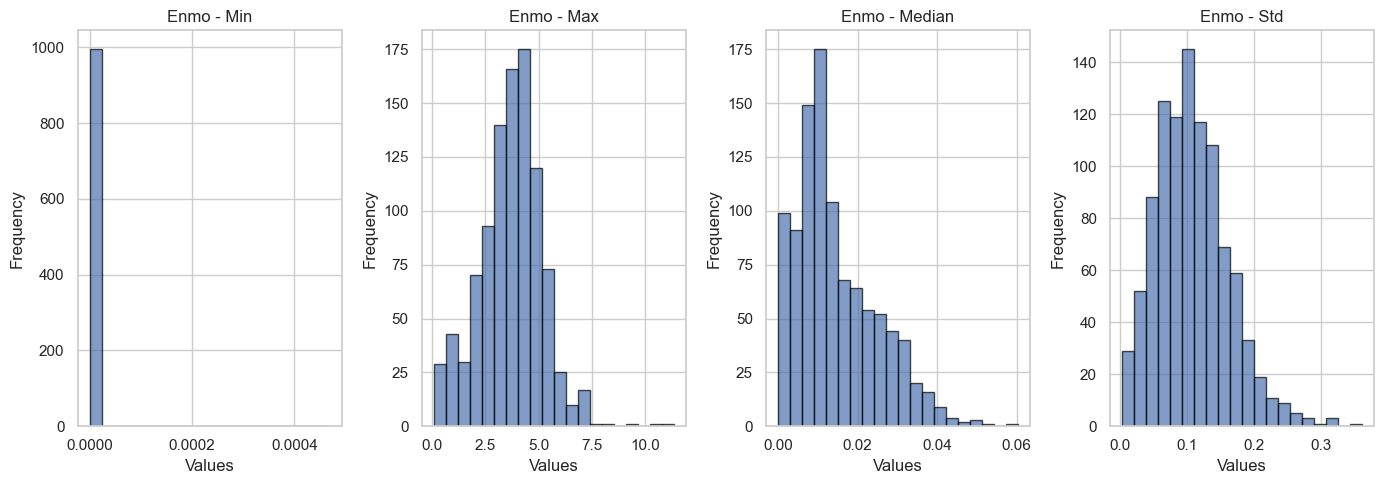

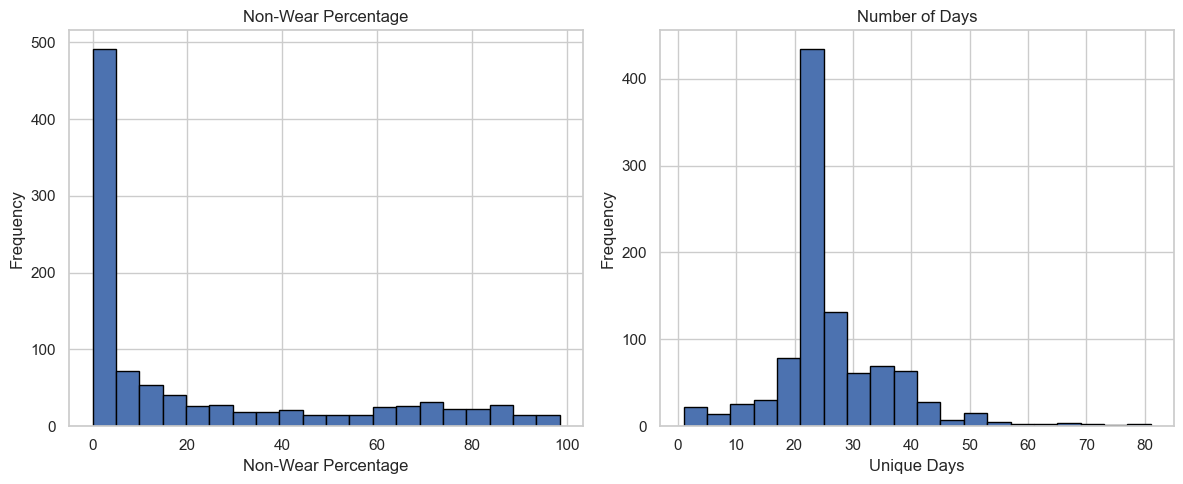

,non_wear_percentage,unique_days
count,996.000000,996.000000
mean,22.199020,25.892570
std,29.751492,9.950506
min,0.000000,1.000000
25%,0.000000,22.000000
50%,5.145835,24.000000
75%,39.636219,29.000000
max,98.515526,81.000000


In [64]:
# ENMO: Min, Max, Median, STD (Standard Deviation)
def plot_parameter_statistics(actigraphy, parameter):
    stats_to_plot = ['min', 'max', '50%', 'std']
    stat_labels = ['Min', 'Max', 'Median', 'Std']

    plt.figure(figsize=(14, 5))

    for j, stat in enumerate(stats_to_plot):
        plt.subplot(1, 4, j + 1)
        
        data = actigraphy[f'{parameter}_{stat}']
        plt.hist(data, bins=20, alpha=0.7, edgecolor='black')
        
        plt.title(f'{parameter.capitalize()} - {stat_labels[j]}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_parameter_statistics(actigraphy, 'enmo')


# Non-wear percentage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(actigraphy['non_wear_percentage'], bins=20, edgecolor='black')
plt.title('Non-Wear Percentage')
plt.xlabel('Non-Wear Percentage')
plt.ylabel('Frequency')

# Number of days
plt.subplot(1, 2, 2)
plt.hist(actigraphy['unique_days'], bins=20, edgecolor='black')
plt.title('Number of Days')
plt.xlabel('Unique Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# info on actigraphy data
actigraphy[['non_wear_percentage', 'unique_days']].describe()




# PHASE 4: BUILDING AND TRAINING THE MODEL(S)
### blah blah blah

In [4]:
print(actigraphy.columns[:10])
print(train.columns[:10])

class CMIPreprocessor:
    """
    Comprehensive preprocessing pipeline for CMI Problematic Internet Use dataset
    """
    
    def __init__(self):
        self.scalers = {}
        self.imputers = {}
        self.label_encoders = {}
        self.feature_names = []
        self.engineered_features = []
        
    def load_and_initial_clean(self, train_path, test_path):
        """Load data and perform initial cleaning"""
        self.train_df = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/train.csv")
        self.test_df = pd.read_csv("/Users/tomragus/Library/CloudStorage/OneDrive-UCSanDiego/CMI-PIU-Model/data/test.csv")
        
        print(f"Training data shape: {self.train_df.shape}")
        print(f"Test data shape: {self.test_df.shape}")
        
        # Remove completely empty rows
        self.train_df = self.train_df.dropna(how='all')
        self.test_df = self.test_df.dropna(how='all')

        # ️Drop rows where the target is missing
        self.train_df = self.train_df.dropna(subset=['sii'])
        
        # Identify target variable
        self.target = 'sii'
        
        # Separate features and target
        self.y_train = self.train_df[self.target].copy()

        assert self.y_train.isnull().sum() == 0, "Target contains missing values!"
        
        self.X_train = self.train_df.drop(columns=[self.target]).copy()
        self.X_test = self.test_df.copy()
        
        print(f"After cleaning - Training: {self.X_train.shape}, Test: {self.X_test.shape}")
        return self
    
    def integrate_actigraphy_features(self, actigraphy_df, id_col='id'):
        """
        Merge actigraphy-derived features into train and test
        """
        print("\n=== INTEGRATING ACTIGRAPHY FEATURES ===")
        
        # Merge based on ID (e.g. 'id')
        self.X_train = self.X_train.merge(actigraphy_df, on=id_col, how='left')
        self.X_test = self.X_test.merge(actigraphy_df, on=id_col, how='left')

        self.actigraphy_features = [col for col in self.X_train.columns if col.startswith('actigraphy_')]

        self.X_train.drop(columns=['id'], inplace=True)
        self.X_test.drop(columns=['id'], inplace=True)
        
        print(f"Identified {len(self.actigraphy_features)} actigraphy features")
    
        print(f"Post-merge shapes — Train: {self.X_train.shape}, Test: {self.X_test.shape}")
        return self

    def analyze_missing_data(self):
        """Analyze missing data patterns"""
        print("\n=== MISSING DATA ANALYSIS ===")
        
        # Calculate missing percentages
        train_missing = (self.X_train.isnull().sum() / len(self.X_train)) * 100
        test_missing = (self.X_test.isnull().sum() / len(self.X_test)) * 100
        
        missing_df = pd.DataFrame({
            'Train_Missing_%': train_missing,
            'Test_Missing_%': test_missing
        }).sort_values('Train_Missing_%', ascending=False)
        
        print("Top 15 features with most missing data:")
        print(missing_df.head(15))
        
        # Features with >80% missing
        high_missing = missing_df[missing_df['Train_Missing_%'] > 80].index.tolist()
        print(f"\nFeatures with >80% missing data ({len(high_missing)}): {high_missing}")
        
        return missing_df
    
    def create_feature_groups(self):
        """Group related features for better handling"""
        self.feature_groups = {
            'demographics': ['Basic_Demos-Age', 'Basic_Demos-Sex', 'Basic_Demos-Enroll_Season'],
            'physical_basic': ['Physical-BMI', 'Physical-Height', 'Physical-Weight', 
                             'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 
                             'Physical-HeartRate', 'Physical-Systolic_BP'],
            'fitness': ['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 
                       'Fitness_Endurance-Time_Sec'],
            'functional_tests': [col for col in self.X_train.columns if 'FGC-' in col],
            'body_composition': [col for col in self.X_train.columns if 'BIA-' in col],
            'activity_questionnaires': [col for col in self.X_train.columns if 'PAQ_' in col],
            'psychological': [col for col in self.X_train.columns if 'PCIAT-' in col],
            'other_assessments': [col for col in self.X_train.columns if 'SDS-' in col or 'CGAS-' in col],
            'education': [col for col in self.X_train.columns if 'PreInt_EduHx-' in col]
        }
        
        print("\n=== FEATURE GROUPS ===")
        for group, features in self.feature_groups.items():
            print(f"{group}: {len(features)} features")
        
        return self
    
    def engineer_features(self):
        """Create engineered features"""
        print("\n=== FEATURE ENGINEERING ===")
        
        # Combine train and test for consistent feature engineering
        combined_df = pd.concat([self.X_train, self.X_test], ignore_index=True)
        
        # 1. Physical Health Composite Features
        if 'Physical-BMI' in combined_df.columns:
            # BMI categories
            combined_df['BMI_category'] = pd.cut(combined_df['Physical-BMI'], 
                                               bins=[0, 18.5, 25, 30, 100], 
                                               labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
            
            # Waist-to-height ratio (if both available)
            if 'Physical-Waist_Circumference' in combined_df.columns and 'Physical-Height' in combined_df.columns:
                combined_df['Waist_Height_Ratio'] = combined_df['Physical-Waist_Circumference'] / combined_df['Physical-Height']
        
        # 2. Blood Pressure Categories
        if 'Physical-Systolic_BP' in combined_df.columns and 'Physical-Diastolic_BP' in combined_df.columns:
            combined_df['BP_Category'] = 'Normal'
            combined_df.loc[(combined_df['Physical-Systolic_BP'] >= 140) | 
                           (combined_df['Physical-Diastolic_BP'] >= 90), 'BP_Category'] = 'High'
            combined_df.loc[(combined_df['Physical-Systolic_BP'] >= 120) & 
                           (combined_df['Physical-Systolic_BP'] < 140), 'BP_Category'] = 'Elevated'
        
        # 3. Fitness Performance Index
        fitness_cols = ['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins']
        if all(col in combined_df.columns for col in fitness_cols):
            # Normalize and combine fitness metrics
            combined_df['Fitness_Index'] = (
                combined_df['Fitness_Endurance-Max_Stage'].fillna(0) * 0.6 +
                combined_df['Fitness_Endurance-Time_Mins'].fillna(0) * 0.4
            )
        
        # 4. PCIAT Subscales (if PCIAT items available)
        pciat_cols = [col for col in combined_df.columns if 'PCIAT-PCIAT_' in col and col != 'PCIAT-PCIAT_Total']
        if len(pciat_cols) >= 10:
            # Create subscales based on common PCIAT factor structure
            # Compulsive Use (items 1, 2, 3, 4, 5)
            compulsive_items = [f'PCIAT-PCIAT_{i:02d}' for i in range(1, 6) if f'PCIAT-PCIAT_{i:02d}' in combined_df.columns]
            if compulsive_items:
                combined_df['PCIAT_Compulsive'] = combined_df[compulsive_items].mean(axis=1)
            
            # Neglect (items 6, 7, 8, 9, 10)
            neglect_items = [f'PCIAT-PCIAT_{i:02d}' for i in range(6, 11) if f'PCIAT-PCIAT_{i:02d}' in combined_df.columns]
            if neglect_items:
                combined_df['PCIAT_Neglect'] = combined_df[neglect_items].mean(axis=1)
            
            # Control (items 11-20)
            control_items = [f'PCIAT-PCIAT_{i:02d}' for i in range(11, 21) if f'PCIAT-PCIAT_{i:02d}' in combined_df.columns]
            if control_items:
                combined_df['PCIAT_Control'] = combined_df[control_items].mean(axis=1)
        
        # 5. Age-adjusted features
        if 'Basic_Demos-Age' in combined_df.columns:
            # Age groups
            combined_df['Age_Group'] = pd.cut(combined_df['Basic_Demos-Age'], 
                                           bins=[0, 8, 12, 16, 25], 
                                           labels=['Child', 'PreTeen', 'Teen', 'Young_Adult'])
            
            # Age-adjusted BMI percentiles (simplified)
            if 'Physical-BMI' in combined_df.columns:
                combined_df['BMI_Age_Adjusted'] = combined_df['Physical-BMI'] / (combined_df['Basic_Demos-Age'] / 10)
        
        # 6. Body Composition Ratios
        if 'BIA-BIA_Fat' in combined_df.columns and 'BIA-BIA_FFM' in combined_df.columns:
            combined_df['Fat_to_FFM_Ratio'] = combined_df['BIA-BIA_Fat'] / (combined_df['BIA-BIA_FFM'] + 1e-6)
        
        # 7. Activity vs Screen Time Balance
        if 'PAQ_A-PAQ_A_Total' in combined_df.columns and 'PreInt_EduHx-computerinternet_hoursday' in combined_df.columns:
            combined_df['Activity_Screen_Balance'] = combined_df['PAQ_A-PAQ_A_Total'] / (combined_df['PreInt_EduHx-computerinternet_hoursday'] + 1e-6)
        
        # 8. Missingness indicators for important features
        important_features = ['Physical-BMI', 'PCIAT-PCIAT_Total', 'PAQ_A-PAQ_A_Total']
        for feature in important_features:
            if feature in combined_df.columns:
                combined_df[f'{feature}_missing'] = combined_df[feature].isnull().astype(int)
        
        # Split back to train and test
        self.X_train_engineered = combined_df.iloc[:len(self.X_train)].copy()
        self.X_test_engineered = combined_df.iloc[len(self.X_train):].copy()
        
        # Track engineered features
        original_features = set(self.X_train.columns)
        new_features = set(self.X_train_engineered.columns) - original_features
        self.engineered_features = list(new_features)
        
        print(f"Created {len(self.engineered_features)} engineered features:")
        print(self.engineered_features)
        
        return self
    
    def handle_missing_values(self):
        """Smart missing value imputation"""
        print("\n=== MISSING VALUE IMPUTATION ===")
        
        # Separate numerical and categorical features
        numerical_features = self.X_train_engineered.select_dtypes(include=[np.number]).columns.tolist()
        categorical_features = self.X_train_engineered.select_dtypes(exclude=[np.number]).columns.tolist()
        
        # Handle categorical features
        for col in categorical_features:
            if col in self.X_train_engineered.columns:
                # Use mode for categorical
                mode_val = self.X_train_engineered[col].mode()[0] if not self.X_train_engineered[col].mode().empty else 'Unknown'
                self.X_train_engineered[col] = self.X_train_engineered[col].fillna(mode_val)
                self.X_test_engineered[col] = self.X_test_engineered[col].fillna(mode_val)
                
                # Label encode categorical features
                le = LabelEncoder()
                combined_values = pd.concat([self.X_train_engineered[col], self.X_test_engineered[col]])
                le.fit(combined_values)
                self.X_train_engineered[col] = le.transform(self.X_train_engineered[col])
                self.X_test_engineered[col] = le.transform(self.X_test_engineered[col])
                self.label_encoders[col] = le
        
        # Handle numerical features with different strategies
        # 1. Simple imputation for basic features
        basic_features = ['Basic_Demos-Age', 'Physical-BMI', 'Physical-Height', 'Physical-Weight']
        basic_numerical = [col for col in basic_features if col in numerical_features]
        
        if basic_numerical:
            imputer_basic = SimpleImputer(strategy='median')
            self.X_train_engineered[basic_numerical] = imputer_basic.fit_transform(self.X_train_engineered[basic_numerical])
            self.X_test_engineered[basic_numerical] = imputer_basic.transform(self.X_test_engineered[basic_numerical])
            self.imputers['basic'] = imputer_basic
        
        # 2. KNN imputation for correlated features (body composition)
        bia_features = [col for col in numerical_features if 'BIA-' in col]
        if len(bia_features) > 3:
            imputer_knn = KNNImputer(n_neighbors=5)
            self.X_train_engineered[bia_features] = imputer_knn.fit_transform(self.X_train_engineered[bia_features])
            self.X_test_engineered[bia_features] = imputer_knn.transform(self.X_test_engineered[bia_features])
            self.imputers['bia'] = imputer_knn
        
        # 3. Zero imputation for questionnaire items (assuming missing = not endorsed)
        questionnaire_features = [col for col in numerical_features if any(x in col for x in ['PCIAT-PCIAT_', 'PAQ_', 'SDS-'])]
        if questionnaire_features:
            self.X_train_engineered[questionnaire_features] = self.X_train_engineered[questionnaire_features].fillna(0)
            self.X_test_engineered[questionnaire_features] = self.X_test_engineered[questionnaire_features].fillna(0)
        
        # 4. Median imputation for remaining features
        remaining_features = [col for col in numerical_features 
                            if col not in basic_numerical + bia_features + questionnaire_features]
        if remaining_features:
            imputer_remaining = SimpleImputer(strategy='median')
            self.X_train_engineered[remaining_features] = imputer_remaining.fit_transform(self.X_train_engineered[remaining_features])
            self.X_test_engineered[remaining_features] = imputer_remaining.transform(self.X_test_engineered[remaining_features])
            self.imputers['remaining'] = imputer_remaining
        
        print("Missing value imputation completed!")
        print(f"Remaining missing values in train: {self.X_train_engineered.isnull().sum().sum()}")
        print(f"Remaining missing values in test: {self.X_test_engineered.isnull().sum().sum()}")
        
        return self
    
    def feature_selection(self, method='mutual_info', k=40):
        """Select most relevant features"""
        print(f"\n=== FEATURE SELECTION ({method}) ===")
        
        if method == 'mutual_info':
            selector = SelectKBest(score_func=mutual_info_regression, k=k)
        else:
            selector = SelectKBest(score_func=f_regression, k=k)
        
        self.X_train_selected = selector.fit_transform(self.X_train_engineered, self.y_train)
        self.X_test_selected = selector.transform(self.X_test_engineered)
        
        # Get selected feature names
        selected_features = self.X_train_engineered.columns[selector.get_support()].tolist()
        self.selected_features = selected_features
        
        print(f"Selected {len(selected_features)} features out of {self.X_train_engineered.shape[1]}")
        print("Top 10 selected features:")
        feature_scores = selector.scores_[selector.get_support()]
        top_features = sorted(zip(selected_features, feature_scores), key=lambda x: x[1], reverse=True)[:10]
        for feature, score in top_features:
            print(f"  {feature}: {score:.3f}")
        
        return self
    
    def scale_features(self, method='robust'):
        """Scale features for modeling"""
        print(f"\n=== FEATURE SCALING ({method}) ===")
        
        if method == 'robust':
            scaler = RobustScaler()
        else:
            scaler = StandardScaler()
        
        self.X_train_scaled = scaler.fit_transform(self.X_train_selected)
        self.X_test_scaled = scaler.transform(self.X_test_selected)
        self.scaler = scaler
        
        print("Feature scaling completed!")
        
        return self
    
    def get_processed_data(self):
        """Return processed data for modeling"""
        return {
            'X_train': self.X_train_scaled,
            'X_test': self.X_test_scaled,
            'y_train': self.y_train,
            'feature_names': self.selected_features,
            'original_train_df': self.train_df,
            'original_test_df': self.test_df
        }

# Model Training and Evaluation Class
class CMIModelTrainer:
    """
    Model training and evaluation for CMI dataset
    """
    
    def __init__(self, X_train, y_train, X_test, feature_names):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.feature_names = feature_names
        self.models = {}
        self.results = {}
        
    def train_baseline_models(self):
        """Train baseline models"""
        print("\n=== TRAINING BASELINE MODELS ===")
        
        # Define models
        models = {
            'Ridge': Ridge(alpha=1.0, random_state=42),
            'Lasso': Lasso(alpha=0.1, random_state=42),
            'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
            'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
            'GradientBoosting': GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state=42)
        }
        
        # Cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        for name, model in models.items():
            print(f"\nTraining {name}...")
            
            # Fit model
            model.fit(self.X_train, self.y_train)
            self.models[name] = model
            
            # Cross-validation scores
            cv_scores = cross_val_score(model, self.X_train, self.y_train, 
                                      cv=5, scoring='neg_mean_squared_error')
            
            # Store results
            self.results[name] = {
                'cv_rmse_mean': np.sqrt(-cv_scores.mean()),
                'cv_rmse_std': np.sqrt(cv_scores.std()),
                'cv_scores': cv_scores
            }
            
            print(f"  CV RMSE: {self.results[name]['cv_rmse_mean']:.4f} (+/- {self.results[name]['cv_rmse_std']:.4f})")
    
    def train_advanced_models(self):
        """Train advanced models (XGBoost, LightGBM)"""
        print("\n=== TRAINING ADVANCED MODELS ===")
        
        # XGBoost
        xgb_model = xgb.XGBRegressor(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42
        )
        
        xgb_model.fit(self.X_train, self.y_train)
        self.models['XGBoost'] = xgb_model
        
        cv_scores = cross_val_score(xgb_model, self.X_train, self.y_train, 
                                  cv=5, scoring='neg_mean_squared_error')
        self.results['XGBoost'] = {
            'cv_rmse_mean': np.sqrt(-cv_scores.mean()),
            'cv_rmse_std': np.sqrt(cv_scores.std()),
            'cv_scores': cv_scores
        }
        
        print(f"XGBoost CV RMSE: {self.results['XGBoost']['cv_rmse_mean']:.4f} (+/- {self.results['XGBoost']['cv_rmse_std']:.4f})")
        
        # LightGBM
        lgb_model = lgb.LGBMRegressor(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            verbosity=-1
        )
        
        lgb_model.fit(self.X_train, self.y_train)
        self.models['LightGBM'] = lgb_model
        
        cv_scores = cross_val_score(lgb_model, self.X_train, self.y_train, 
                                  cv=5, scoring='neg_mean_squared_error')
        self.results['LightGBM'] = {
            'cv_rmse_mean': np.sqrt(-cv_scores.mean()),
            'cv_rmse_std': np.sqrt(cv_scores.std()),
            'cv_scores': cv_scores
        }
        
        print(f"LightGBM CV RMSE: {self.results['LightGBM']['cv_rmse_mean']:.4f} (+/- {self.results['LightGBM']['cv_rmse_std']:.4f})")
    
    def get_best_model(self):
        """Get the best performing model"""
        best_model_name = min(self.results.keys(), key=lambda x: self.results[x]['cv_rmse_mean'])
        return best_model_name, self.models[best_model_name]
    
    def generate_predictions(self, model_name=None):
        """Generate predictions for test set"""
        if model_name is None:
            model_name, _ = self.get_best_model()
        
        model = self.models[model_name]
        predictions = model.predict(self.X_test)
        
        return predictions, model_name

# Usage Example
def main():
    """
    Main preprocessing and modeling pipeline
    """
    # Initialize preprocessor
    preprocessor = CMIPreprocessor()
    
    # Load and preprocess data
    preprocessor.load_and_initial_clean('train.csv', 'test.csv')
    preprocessor.integrate_actigraphy_features(actigraphy, id_col='id')
    preprocessor.analyze_missing_data()
    preprocessor.create_feature_groups()
    preprocessor.engineer_features()
    preprocessor.handle_missing_values()
    preprocessor.feature_selection(method='mutual_info', k=40)
    preprocessor.scale_features(method='robust')
    
    # Get processed data
    data = preprocessor.get_processed_data()
    
    # Initialize model trainer
    trainer = CMIModelTrainer(data['X_train'], data['y_train'], 
                            data['X_test'], data['feature_names'])
    
    # Train models
    trainer.train_baseline_models()
    trainer.train_advanced_models()
    
    # Get best model and predictions
    best_model_name, best_model = trainer.get_best_model()
    predictions, model_name = trainer.generate_predictions()
    
    print(f"\nBest model: {best_model_name}")
    print(f"Predictions shape: {predictions.shape}")
    
    print("Preprocessing pipeline ready!")
    print("Uncomment the lines in main() to run the full pipeline")

if __name__ == "__main__":
   main()

Index(['id', 'non_wear_percentage', 'unique_days', 'enmo_mean', 'enmo_std',
       'enmo_min', 'enmo_25%', 'enmo_50%', 'enmo_75%', 'enmo_max'],
      dtype='object')
Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight'],
      dtype='object')
Training data shape: (3960, 82)
Test data shape: (20, 59)
After cleaning - Training: (2736, 81), Test: (20, 59)

=== INTEGRATING ACTIGRAPHY FEATURES ===
Identified 0 actigraphy features
Post-merge shapes — Train: (2736, 111), Test: (20, 89)

=== MISSING DATA ANALYSIS ===
Top 15 features with most missing data:
                              Train_Missing_%  Test_Missing_%
PAQ_A-Season                        86.732456            95.0
PAQ_A-PAQ_A_Total                   86.732456            95.0
Physical-Waist_Circumference        82.346491            75.0
Fitness_Endurance-Time_Sec          73.391813     

/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM CV RMSE: 0.0234 (+/- 0.0191)

Best model: GradientBoosting
Predictions shape: (20,)
Preprocessing pipeline ready!
Uncomment the lines in main() to run the full pipeline


/opt/anaconda3/envs/ds_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


# PHASE 5: MODEL EVALUATION AND SCORE GENERATION
### blah blah blah

In [5]:
def quadratic_weighted_kappa(y_true, y_pred):
    """
    Calculate quadratic weighted kappa for ordinal classification.
    
    This is the official evaluation metric for the CMI competition.
    """
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Round predictions to nearest integer for ordinal comparison
    y_pred_rounded = np.round(y_pred).astype(int)
    
    # Get unique labels
    labels = np.unique(np.concatenate([y_true, y_pred_rounded]))
    n_labels = len(labels)
    
    # Create label to index mapping
    label_to_idx = {label: idx for idx, label in enumerate(labels)}
    
    # Initialize matrices
    O = np.zeros((n_labels, n_labels))  # Observed matrix
    W = np.zeros((n_labels, n_labels))  # Weight matrix
    
    # Fill observed matrix O
    for true_val, pred_val in zip(y_true, y_pred_rounded):
        true_idx = label_to_idx[true_val]
        pred_idx = label_to_idx[pred_val]
        O[true_idx, pred_idx] += 1
    
    # Fill weight matrix W (quadratic weights)
    for i in range(n_labels):
        for j in range(n_labels):
            W[i, j] = ((i - j) ** 2) / ((n_labels - 1) ** 2)
    
    # Calculate expected matrix E
    actual_hist = O.sum(axis=1)
    pred_hist = O.sum(axis=0)
    E = np.outer(actual_hist, pred_hist) / O.sum()
    
    # Calculate quadratic weighted kappa
    numerator = np.sum(W * O)
    denominator = np.sum(W * E)
    
    if denominator == 0:
        return 0.0
    
    kappa = 1 - (numerator / denominator)
    return kappa


class CMIModelEvaluator:
    """
    Comprehensive model evaluation and submission generator for CMI dataset
    """
    
    def __init__(self, trainer, original_test_df):
        self.trainer = trainer
        self.original_test_df = original_test_df
        self.evaluation_results = {}
        self.submissions = {}
        
    def evaluate_all_models(self):
        """Evaluate all trained models using cross-validation with QWK as primary metric"""
        print("\n=== COMPREHENSIVE MODEL EVALUATION ===")
        print("Primary metric: Quadratic Weighted Kappa (QWK)")
        print("QWK ranges from 0 (random agreement) to 1 (perfect agreement)")
        print("Higher QWK scores are better!")
        
        # Create a more detailed evaluation
        for model_name, model in self.trainer.models.items():
            print(f"\nEvaluating {model_name}...")
            
            # Cross-validation with multiple metrics
            cv_results = self._cross_validate_model(model, model_name)
            
            # Store results
            self.evaluation_results[model_name] = cv_results
            
            # Print results
            print(f"  QWK:  {cv_results['qwk_mean']:.4f} (+/- {cv_results['qwk_std']:.4f})")
            print(f"  RMSE: {cv_results['rmse_mean']:.4f} (+/- {cv_results['rmse_std']:.4f})")
            print(f"  MAE:  {cv_results['mae_mean']:.4f} (+/- {cv_results['mae_std']:.4f})")
            print(f"  R²:   {cv_results['r2_mean']:.4f} (+/- {cv_results['r2_std']:.4f})")
    
    def _cross_validate_model(self, model, model_name):
        """Perform cross-validation with multiple metrics, focusing on QWK"""
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        
        # Create custom scorer for QWK
        qwk_scorer_func = make_scorer(qwk_scorer, greater_is_better=True)
        
        # QWK (Primary metric)
        qwk_scores = cross_val_score(model, self.trainer.X_train, self.trainer.y_train, 
                                    cv=cv, scoring=qwk_scorer_func)
        
        # RMSE
        rmse_scores = cross_val_score(model, self.trainer.X_train, self.trainer.y_train, 
                                     cv=cv, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-rmse_scores)
        
        # MAE
        mae_scores = cross_val_score(model, self.trainer.X_train, self.trainer.y_train, 
                                    cv=cv, scoring='neg_mean_absolute_error')
        mae_scores = -mae_scores
        
        # R²
        r2_scores = cross_val_score(model, self.trainer.X_train, self.trainer.y_train, 
                                   cv=cv, scoring='r2')
        
        return {
            'qwk_mean': qwk_scores.mean(),
            'qwk_std': qwk_scores.std(),
            'qwk_scores': qwk_scores,
            'rmse_mean': rmse_scores.mean(),
            'rmse_std': rmse_scores.std(),
            'rmse_scores': rmse_scores,
            'mae_mean': mae_scores.mean(),
            'mae_std': mae_scores.std(),
            'mae_scores': mae_scores,
            'r2_mean': r2_scores.mean(),
            'r2_std': r2_scores.std(),
            'r2_scores': r2_scores
        }
    
    def generate_predictions_all_models(self):
        """Generate predictions for all models with proper rounding for ordinal outcomes"""
        print("\n=== GENERATING PREDICTIONS FOR ALL MODELS ===")
        
        predictions_dict = {}
        
        for model_name, model in self.trainer.models.items():
            print(f"Generating predictions for {model_name}...")
            
            # Generate raw predictions
            raw_predictions = model.predict(self.trainer.X_test)
            
            # Round predictions to nearest integer for ordinal classification
            # But keep some models with raw predictions for ensemble diversity
            if model_name in ['Ridge', 'Lasso', 'ElasticNet']:
                # For linear models, round to nearest integer
                predictions = np.round(raw_predictions).astype(int)
            else:
                # For tree-based models, use raw predictions (will be rounded in ensemble)
                predictions = raw_predictions
            
            # Ensure predictions are within reasonable bounds
            # Based on typical SII ranges (usually 0-4 or similar)
            predictions = np.clip(predictions, 0, 4)
            
            predictions_dict[model_name] = predictions
            
            # Create submission DataFrame
            submission_df = pd.DataFrame({
                'id': self.original_test_df['id'],
                'sii': predictions
            })
            
            # Store submission
            self.submissions[model_name] = submission_df
            
            print(f"  Predictions range: [{predictions.min():.3f}, {predictions.max():.3f}]")
            print(f"  Predictions mean: {predictions.mean():.3f}")
            print(f"  Unique values: {sorted(np.unique(predictions))}")
        
        return predictions_dict
    
    def create_ensemble_submission(self, models_to_ensemble=None, weights=None):
        """Create ensemble predictions from multiple models with proper ordinal handling"""
        print("\n=== CREATING ENSEMBLE SUBMISSION ===")
        
        if models_to_ensemble is None:
            # Use top 3 models by QWK score
            sorted_models = sorted(self.evaluation_results.items(), 
                                 key=lambda x: x[1]['qwk_mean'], reverse=True)
            models_to_ensemble = [name for name, _ in sorted_models[:3]]
        
        if weights is None:
            # Use QWK-based weights (higher QWK gets more weight)
            qwk_scores = [self.evaluation_results[name]['qwk_mean'] for name in models_to_ensemble]
            # Convert to positive weights and normalize
            min_qwk = min(qwk_scores)
            adjusted_qwk = [score - min_qwk + 0.1 for score in qwk_scores]  # Add small constant
            total_weight = sum(adjusted_qwk)
            weights = [w / total_weight for w in adjusted_qwk]
        
        print(f"Ensemble models: {models_to_ensemble}")
        print(f"Weights (QWK-based): {[f'{w:.3f}' for w in weights]}")
        
        # Generate ensemble predictions
        ensemble_predictions = np.zeros(len(self.original_test_df))
        
        for model_name, weight in zip(models_to_ensemble, weights):
            model_predictions = self.trainer.models[model_name].predict(self.trainer.X_test)
            ensemble_predictions += weight * model_predictions
        
        # Round ensemble predictions to nearest integer for ordinal classification
        ensemble_predictions = np.round(ensemble_predictions).astype(int)
        
        # Ensure predictions are within reasonable bounds
        ensemble_predictions = np.clip(ensemble_predictions, 0, 4)
        
        # Create ensemble submission
        ensemble_submission = pd.DataFrame({
            'id': self.original_test_df['id'],
            'sii': ensemble_predictions
        })
        
        self.submissions['Ensemble'] = ensemble_submission
        
        print(f"Ensemble predictions range: [{ensemble_predictions.min()}, {ensemble_predictions.max()}]")
        print(f"Ensemble predictions mean: {ensemble_predictions.mean():.3f}")
        print(f"Unique values: {sorted(np.unique(ensemble_predictions))}")
        
        return ensemble_submission
    
    def save_submissions(self, output_dir='submissions'):
        """Save all submission files"""
        print(f"\n=== SAVING SUBMISSIONS ===")
        
        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        
        # Save each submission
        for model_name, submission_df in self.submissions.items():
            # Create filename with timestamp
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"{model_name.lower().replace(' ', '_')}_submission_{timestamp}.csv"
            filepath = os.path.join(output_dir, filename)
            
            # Save submission
            submission_df.to_csv(filepath, index=False)
            print(f"  Saved: {filepath}")
        
        print(f"All submissions saved to {output_dir}/")
    
    def plot_model_comparison(self):
        """Plot model comparison with QWK as primary metric"""
        print("\n=== PLOTTING MODEL COMPARISON ===")
        
        if not self.evaluation_results:
            print("No evaluation results found. Run evaluate_all_models() first.")
            return
        
        # Create comparison plot
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        models = list(self.evaluation_results.keys())
        
        # QWK comparison (most important)
        qwk_means = [self.evaluation_results[m]['qwk_mean'] for m in models]
        qwk_stds = [self.evaluation_results[m]['qwk_std'] for m in models]
        
        axes[0, 0].bar(models, qwk_means, yerr=qwk_stds, capsize=5, color='gold')
        axes[0, 0].set_title('Quadratic Weighted Kappa (Primary Metric)')
        axes[0, 0].set_ylabel('QWK Score')
        axes[0, 0].tick_params(axis='x', rotation=45)
        axes[0, 0].grid(True, alpha=0.3)
        
        # RMSE comparison
        rmse_means = [self.evaluation_results[m]['rmse_mean'] for m in models]
        rmse_stds = [self.evaluation_results[m]['rmse_std'] for m in models]
        
        axes[0, 1].bar(models, rmse_means, yerr=rmse_stds, capsize=5, color='lightcoral')
        axes[0, 1].set_title('RMSE Comparison')
        axes[0, 1].set_ylabel('RMSE')
        axes[0, 1].tick_params(axis='x', rotation=45)
        axes[0, 1].grid(True, alpha=0.3)
        
        # MAE comparison
        mae_means = [self.evaluation_results[m]['mae_mean'] for m in models]
        mae_stds = [self.evaluation_results[m]['mae_std'] for m in models]
        
        axes[1, 0].bar(models, mae_means, yerr=mae_stds, capsize=5, color='lightblue')
        axes[1, 0].set_title('MAE Comparison')
        axes[1, 0].set_ylabel('MAE')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].grid(True, alpha=0.3)
        
        # R² comparison
        r2_means = [self.evaluation_results[m]['r2_mean'] for m in models]
        r2_stds = [self.evaluation_results[m]['r2_std'] for m in models]
        
        axes[1, 1].bar(models, r2_means, yerr=r2_stds, capsize=5, color='lightgreen')
        axes[1, 1].set_title('R² Comparison')
        axes[1, 1].set_ylabel('R²')
        axes[1, 1].tick_params(axis='x', rotation=45)
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def plot_prediction_distributions(self):
        """Plot prediction distributions for all models"""
        print("\n=== PLOTTING PREDICTION DISTRIBUTIONS ===")
        
        if not self.submissions:
            print("No submissions found. Run generate_predictions_all_models() first.")
            return
        
        # Create distribution plots
        n_models = len(self.submissions)
        fig, axes = plt.subplots(2, (n_models + 1) // 2, figsize=(15, 8))
        axes = axes.flatten() if n_models > 1 else [axes]
        
        for i, (model_name, submission_df) in enumerate(self.submissions.items()):
            if i < len(axes):
                axes[i].hist(submission_df['sii'], bins=30, alpha=0.7, edgecolor='black')
                axes[i].set_title(f'{model_name} Predictions')
                axes[i].set_xlabel('SII')
                axes[i].set_ylabel('Frequency')
                axes[i].grid(True, alpha=0.3)
        
        # Hide unused subplots
        for i in range(len(self.submissions), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def get_model_rankings(self):
        """Get model rankings by QWK (primary metric) and other metrics"""
        print("\n=== MODEL RANKINGS ===")
        
        if not self.evaluation_results:
            print("No evaluation results found. Run evaluate_all_models() first.")
            return
        
        # Create rankings DataFrame
        rankings_data = []
        
        for model_name, results in self.evaluation_results.items():
            rankings_data.append({
                'Model': model_name,
                'QWK': results['qwk_mean'],
                'QWK_std': results['qwk_std'],
                'RMSE': results['rmse_mean'],
                'MAE': results['mae_mean'],
                'R²': results['r2_mean']
            })
        
        rankings_df = pd.DataFrame(rankings_data)
        
        # Sort by QWK (higher is better)
        rankings_df = rankings_df.sort_values('QWK', ascending=False)
        
        print("Model Rankings (by Quadratic Weighted Kappa - Competition Metric):")
        print("=" * 70)
        print(rankings_df.to_string(index=False, float_format='%.4f'))
        
        print(f"\nBest Model: {rankings_df.iloc[0]['Model']} (QWK: {rankings_df.iloc[0]['QWK']:.4f})")
        
        return rankings_df
    
    def analyze_feature_importance(self, model_name=None):
        """Analyze feature importance for tree-based models"""
        print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
        
        if model_name is None:
            # Use the best model by QWK
            best_model_name = max(self.evaluation_results.keys(), 
                                key=lambda x: self.evaluation_results[x]['qwk_mean'])
            model_name = best_model_name
        
        model = self.trainer.models[model_name]
        
        # Check if model has feature_importances_
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = self.trainer.feature_names
            
            # Create feature importance DataFrame
            feature_importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(f"Top 10 features for {model_name} (Best QWK: {self.evaluation_results[model_name]['qwk_mean']:.4f}):")
            print(feature_importance_df.head(10).to_string(index=False))
            
            # Plot feature importance
            plt.figure(figsize=(10, 6))
            top_features = feature_importance_df.head(15)
            plt.barh(range(len(top_features)), top_features['importance'])
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Importance')
            plt.title(f'Feature Importance - {model_name}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
            
            return feature_importance_df
        else:
            print(f"Model {model_name} does not have feature_importances_ attribute")
            return None
    
    def validate_submissions(self):
        """Validate submission formats and check for potential issues"""
        print("\n=== VALIDATING SUBMISSIONS ===")
        
        for model_name, submission_df in self.submissions.items():
            print(f"\nValidating {model_name} submission:")
            
            # Check required columns
            if 'id' not in submission_df.columns or 'sii' not in submission_df.columns:
                print(f"  ❌ Missing required columns (id, sii)")
                continue
                
            # Check for missing values
            if submission_df['id'].isnull().any() or submission_df['sii'].isnull().any():
                print(f"  ❌ Contains missing values")
                continue
                
            # Check SII value range (assuming 0-4 based on typical severity scales)
            sii_values = submission_df['sii'].values
            if np.any(sii_values < 0) or np.any(sii_values > 4):
                print(f"  ⚠️  SII values outside expected range [0, 4]: [{sii_values.min()}, {sii_values.max()}]")
            
            # Check for integer values (important for ordinal classification)
            if not np.all(sii_values == np.round(sii_values)):
                print(f"  ⚠️  SII contains non-integer values (may hurt QWK score)")
                
            # Check unique values
            unique_values = sorted(np.unique(sii_values))
            print(f"  ✅ Shape: {submission_df.shape}")
            print(f"  ✅ Unique SII values: {unique_values}")
            print(f"  ✅ SII distribution: {dict(zip(*np.unique(sii_values, return_counts=True)))}")
            
            print("\n✅ All submissions validated!")
            importances = model.feature_importances_
            feature_names = self.trainer.feature_names
            
            # Create feature importance DataFrame
            feature_importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(f"Top 10 features for {model_name}:")
            print(feature_importance_df.head(10).to_string(index=False))
            
            # Plot feature importance
            plt.figure(figsize=(10, 6))
            top_features = feature_importance_df.head(15)
            plt.barh(range(len(top_features)), top_features['importance'])
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Importance')
            plt.title(f'Feature Importance - {model_name}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
            
            return feature_importance_df
        else:
            print(f"Model {model_name} does not have feature_importances_ attribute")
            return None


def quick_evaluate_and_submit(trainer, original_test_df):
    """
    Quick evaluation and submission generation for already trained models
    """
    print("=== QUICK EVALUATION AND SUBMISSION ===")
    
    # Initialize evaluator
    evaluator = CMIModelEvaluator(trainer, original_test_df)
    
    # Evaluate all models
    evaluator.evaluate_all_models()
    
    # Generate predictions
    evaluator.generate_predictions_all_models()
    
    # Create ensemble
    evaluator.create_ensemble_submission()
    
    # Save submissions
    evaluator.save_submissions()
    
    # Show results
    evaluator.plot_model_comparison()
    rankings = evaluator.get_model_rankings()
    
    return evaluator, rankings

if __name__ == "__main__":
    evaluator, rankings = quick_evaluate_and_submit(trainer, original_test_df)

NameError: name 'trainer' is not defined

# PHASE 6: CONSTRUCTING THE PRESENTATION
### blah blah blah

In [ ]:
# write code here